# Minor Project Exam: Exploratory Data Analysis (EDA) 

### Problem statement:
Perform exploratory data analysis (EDA) on the given dataset using Python libraries such as Numpy, Pandas, and Matplotlib/Seaborn. The goal is to uncover underlying patterns, relationships, and insights from the data. 

##### Additionally, document your process with Python comments explaining your code, and for each section, provide detailed conclusions and observations. 


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

### Section 1: Understanding the Dataset

#### 1.1	Load Data: Import the dataset into your working environment using appropriate methods or libraries.

In [8]:
data = pd.read_csv('car_price_dataset.csv')

#### 1.2	Checking Data Shape: Determine the shape of your dataset, including the number of rows and columns.

In [9]:
print(f"\nNumber of rows: {data.shape[0]}, Number of columns: {data.shape[1]}")


Number of rows: 15411, Number of columns: 14


#### 1.3	View Data: Display the first and last few rows of the dataset and summarize any initial insights.

In [10]:
data

Unnamed: 0         car_name     brand     model  vehicle_age   
0               0      Maruti Alto    Maruti      Alto            9  \
1               1    Hyundai Grand   Hyundai     Grand            5   
2               2      Hyundai i20   Hyundai       i20           11   
3               3      Maruti Alto    Maruti      Alto            9   
4               4    Ford Ecosport      Ford  Ecosport            6   
...           ...              ...       ...       ...          ...   
15406       19537      Hyundai i10   Hyundai       i10            9   
15407       19540    Maruti Ertiga    Maruti    Ertiga            2   
15408       19541      Skoda Rapid     Skoda     Rapid            6   
15409       19542  Mahindra XUV500  Mahindra    XUV500            5   
15410       19543       Honda City     Honda      City            2   

       km_driven seller_type fuel_type transmission_type  mileage  engine   
0         120000  Individual    Petrol            Manual    19.70     796  \
1          20000  Individual    Petrol            Manual    18.90    1197   
2          60000  Individual    Petrol            Manual    17.00    1197   
3          37000  Individual    Petrol            Manual    20.92     998   
4          30000      Dealer    Diesel            Manual    22.77    1498   
...          ...         ...       ...               ...      ...     ...   
15406      10723      Dealer    Petrol            Manual    19.81    1086   
15407      18000      Dealer    Petrol            Manual    17.50    1373   
15408      67000      Dealer    Diesel            Manual    21.14    1498   
15409    3800000      Dealer    Diesel            Manual    16.00    2179   
15410      13000      Dealer    Petrol         Automatic    18.00    1497   

       max_power  seats  selling_price  
0          46.30      5         120000  
1          82.00      5         550000  
2          80.00      5         215000  
3          67.10      5         226000  
4          98.59      5         570000  
...          ...    ...            ...  
15406      68.05      5         250000  
15407      91.10      7         925000  
15408     103.52      5         425000  
15409     140.00      7        1225000  
15410     117.60      5        1200000  

[15411 rows x 14 columns]

#### Initial observations

There is a unamed column with all unique values, indicating that it is an index, this column can be dropped. 

We can seee a combination of categorical and numeric values, some are integers and some are floats, we can explore the exact counts of these. 

Exact car names may not be included in the model - we want the model to be able to generalize well and including encoding for a model name will not transfer to unseen car names and model types.

Its also possible that other values like number of seats, fuel type and max power could correlate closely with the types.

Brand seems like a good candidate categorical feature to include

In [11]:
# dropping 'Unamed: 0'
data.drop(columns=['Unnamed: 0'], inplace=True)

### Section 2: Initial Data Examination

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15411 non-null  object 
 1   brand              15411 non-null  object 
 2   model              15411 non-null  object 
 3   vehicle_age        15411 non-null  int64  
 4   km_driven          15411 non-null  int64  
 5   seller_type        15411 non-null  object 
 6   fuel_type          15411 non-null  object 
 7   transmission_type  15411 non-null  object 
 8   mileage            15411 non-null  float64
 9   engine             15411 non-null  int64  
 10  max_power          15411 non-null  float64
 11  seats              15411 non-null  int64  
 12  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.5+ MB


#### 2.1	Dataset Information: Provide a concise summary of the dataset, including the number of non-null entries, and explain what this reveals.

In [12]:
# check for nulls
data.isnull().sum()

car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

In [13]:
# check for string nulls containing potential words like 'null', 'none', 'uknown', etc.

unkown_values = ['null', 'none', 'unknown', 'n/a', 'na', 'nan']

for col in data.select_dtypes(include=['object']).columns:
    # print counts per column for each unknown value
    all_unknowns = 0
    for value in unkown_values:
        # look for exact value
        count = data[col].str.lower().eq(value).sum()
        all_unknowns += count
        if count > 0:
            print(f"{col} contains {count} instances of '{value}'")

    print(f"{col} contains a total of {all_unknowns} unknown values across all unkown_values")

car_name contains a total of 0 unknown values across all unkown_values
brand contains a total of 0 unknown values across all unkown_values
model contains a total of 0 unknown values across all unkown_values
seller_type contains a total of 0 unknown values across all unkown_values
fuel_type contains a total of 0 unknown values across all unkown_values
transmission_type contains a total of 0 unknown values across all unkown_values


#### Observations

We can safely conclude that there are no nulls within the dataset. 

This means that the data is complete in terms of its content and we will not need to impute any missing values, nor drop rows or columns. 

#### 2.2 Inspect Data Types: Check data type of each column in the dataset. If columns need any data type conversion, update the data type accordingly and describe the rationale behind the conversions.

In [14]:
# check data types of each column
data.dtypes

car_name              object
brand                 object
model                 object
vehicle_age            int64
km_driven              int64
seller_type           object
fuel_type             object
transmission_type     object
mileage              float64
engine                 int64
max_power            float64
seats                  int64
selling_price          int64
dtype: object

In [15]:
# count of unique values in each object type column
for col in data.select_dtypes(include=['object']).columns:
    print(f"\n{col} unique values: {data[col].nunique()}")


car_name unique values: 121

brand unique values: 32

model unique values: 120

seller_type unique values: 3

fuel_type unique values: 5

transmission_type unique values: 2


#### 2.3 Summary Statistics: Generate summary statistics for the numerical columns and interpret what these statistics tell you about the data.

In [16]:
data.describe()

vehicle_age     km_driven       mileage        engine     max_power   
count  15411.000000  1.541100e+04  15411.000000  15411.000000  15411.000000  \
mean       6.036338  5.561648e+04     19.701151   1486.057751    100.588254   
std        3.013291  5.161855e+04      4.171265    521.106696     42.972979   
min        0.000000  1.000000e+02      4.000000    793.000000     38.400000   
25%        4.000000  3.000000e+04     17.000000   1197.000000     74.000000   
50%        6.000000  5.000000e+04     19.670000   1248.000000     88.500000   
75%        8.000000  7.000000e+04     22.700000   1582.000000    117.300000   
max       29.000000  3.800000e+06     33.540000   6592.000000    626.000000   

              seats  selling_price  
count  15411.000000   1.541100e+04  
mean       5.325482   7.749711e+05  
std        0.807628   8.941284e+05  
min        0.000000   4.000000e+04  
25%        5.000000   3.850000e+05  
50%        5.000000   5.560000e+05  
75%        5.000000   8.250000e+05  
max        9.000000   3.950000e+07

#### Summary Statistics Insights

Based on the descriptive statistics, here are the key insights about our car price dataset:

**1. Dataset Size & Completeness:**
- The dataset contains 15,411 complete records across all numerical features
- No missing values detected in numerical columns (all counts are identical)

**2. Vehicle Age Analysis:**
- **Mean age:** 6 years (relatively young fleet)
- **Distribution:** Right-skewed with most cars between 4-8 years old
- **Range:** 0-29 years (brand new to very old vehicles)
- **Insight:** The dataset has a good mix of vehicle ages, predominantly focusing on used cars

**3. Mileage (km_driven) Analysis:**
- **Mean:** 55,616 km (moderate usage)
- **High variability:** Standard deviation of 51,619 km indicates wide usage patterns
- **Extreme outlier:** Maximum of 3.8 million km suggests data quality issues or commercial vehicles
- **Distribution:** Likely right-skewed with most cars having moderate mileage

**4. Fuel Efficiency (mileage):**
- **Mean:** 19.7 km/l (reasonable fuel efficiency)
- **Range:** 4-33.54 km/l (wide variation in fuel efficiency)
- **Distribution:** Relatively normal distribution around the mean
- **Insight:** Good representation of different vehicle types from fuel-hungry to efficient cars

**5. Engine Displacement:**
- **Mean:** 1,486 cc (typical mid-size engine)
- **Range:** 793-6,592 cc (from small hatchbacks to large SUVs/luxury cars)
- **Distribution:** Concentrated around 1,200-1,600 cc range

**6. Maximum Power:**
- **Mean:** 100.6 bhp (moderate power output)
- **Range:** 38.4-626 bhp (from economy cars to high-performance vehicles)
- **Distribution:** Right-skewed with most cars having 74-117 bhp

**7. Seating Capacity:**
- **Unusual finding:** Minimum of 0 seats suggests data quality issues
- **Mode:** 5 seats (standard passenger cars dominate)
- **Range:** 0-9 seats (from data errors to large commercial vehicles)
- **Low variability:** Standard deviation of 0.81 indicates most cars are 5-seaters

**8. Selling Price (Target Variable):**
- **Mean:** ₹7.75 lakhs (₹775,000)
- **High variability:** Standard deviation of ₹8.94 lakhs indicates significant price dispersion
- **Extreme range:** ₹40,000 to ₹3.95 crores (₹39.5 million)
- **Right-skewed:** Median (₹5.56 lakhs) < Mean (₹7.75 lakhs)
- **Insight:** Presence of luxury/exotic cars creating long tail distribution

**Key Data Quality Concerns:**
1. **Outliers:** Extreme values in km_driven (3.8M km) and selling_price (₹3.95 crores)
2. **Data inconsistency:** 0 seats minimum value needs investigation
3. **Scale differences:** Variables have vastly different scales requiring standardization

**Further Analysis:**
1. Investigate and handle outliers in km_driven and selling_price
2. Examine the 0-seat vehicles for data entry errors
3. Consider log transformation for right-skewed variables (selling_price, km_driven)
4. Apply feature scaling for machine learning models

#### 2.4 Provide detailed comments that explain your understanding of the data.

From the outset we can ascertain that there are potential missing values to impute within number of seats.

Seats are also an interesting feature as they appear numeric however may actually be more categorical in nature. The value is ordinal and 5 seats are strictly greater than 4 seats with a constant unit difference, however non-linear relationships may exist where fewer seats may correlate to more expensive vehicles, such as sports cars.

There is evidence of skew which will need to be investigated in more detail and catered for if necessary. Many of the numeric columns appear to be right skewed an may benefit from transformations to make their distribution more normally shaped. 

There are a number of categorical feature columns which may contain valuable feature correlations with the target price variable. Bran especially is going to yield some significant information on price distribution, however it has a lot of unique features, thus this dimensionality may need to be appropriately addressed

### Section 3: Data Cleaning

#### 3.1 Handling Missing Values: Identify missing values in the dataset and describe how you handled them, including your chosen method.

In [17]:
# take a look at the 0 seat data
data[data['seats'] == 0]

car_name   brand  model  vehicle_age  km_driven seller_type   
3217     Honda City   Honda   City           18      40000  Individual  \
12619  Nissan Kicks  Nissan  Kicks            2      10000  Individual   

      fuel_type transmission_type  mileage  engine  max_power  seats   
3217     Petrol            Manual    13.00    1493     100.00      0  \
12619    Diesel            Manual    19.39    1461     108.49      0   

       selling_price  
3217          115000  
12619        1154000

In [18]:
# replace 0 seats with NaN - this works as there are no other nan values in the dataset
data['seats'].replace(0, np.nan, inplace=True)
# fill NaN with the mode of the column
data['seats'].fillna(data['seats'].mode()[0], inplace=True)

data[data['seats'] == 0]

Empty DataFrame
Columns: [car_name, brand, model, vehicle_age, km_driven, seller_type, fuel_type, transmission_type, mileage, engine, max_power, seats, selling_price]
Index: []

#### 3.2 Handling Duplicates: Check for duplicate rows in the dataset and describe your approach to handling any duplicates found.

In [19]:
# check for duplicates
duplicates = data.duplicated()
print(f"\nNumber of duplicate rows: {duplicates.sum()}")



Number of duplicate rows: 167


In [20]:
# remove duplicates
data.drop_duplicates(inplace=True)
# check for duplicates again
duplicates = data.duplicated()
print(f"\nNumber of duplicate rows: {duplicates.sum()}")


Number of duplicate rows: 0


In [21]:
data.reset_index(drop=True, inplace=True)

#### 3.3 Outliers removal: Check if there are any outliers and remove them using graphical/non-graphical methods.

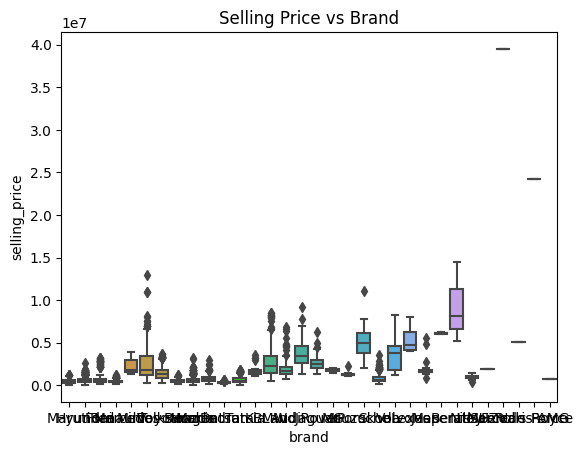

In [22]:
# check for outliers of selling_price based on vehicle age
sns.boxplot(x='brand', y='selling_price', data=data)
plt.title('Selling Price vs Brand')
plt.show()

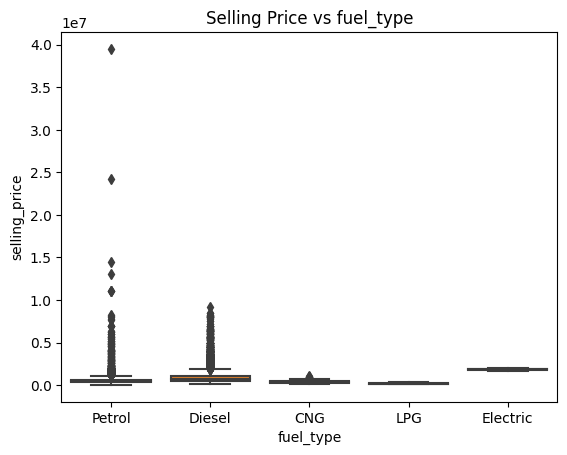

In [23]:
sns.boxplot(x='fuel_type', y='selling_price', data=data)
plt.title('Selling Price vs fuel_type')
plt.show()

In [24]:
data.columns

Index(['car_name', 'brand', 'model', 'vehicle_age', 'km_driven', 'seller_type',
       'fuel_type', 'transmission_type', 'mileage', 'engine', 'max_power',
       'seats', 'selling_price'],
      dtype='object')

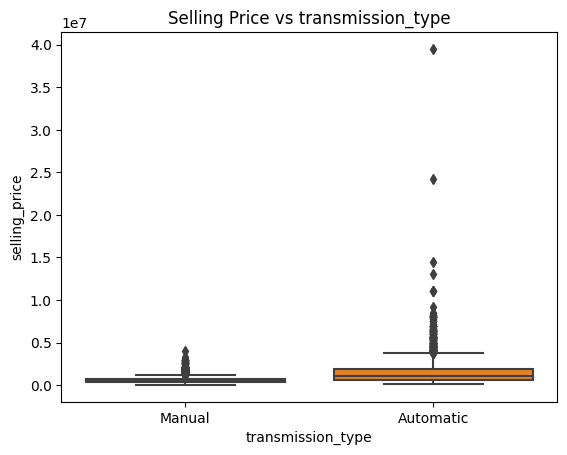

In [25]:
sns.boxplot(x='transmission_type', y='selling_price', data=data)
plt.title('Selling Price vs transmission_type')
plt.show()

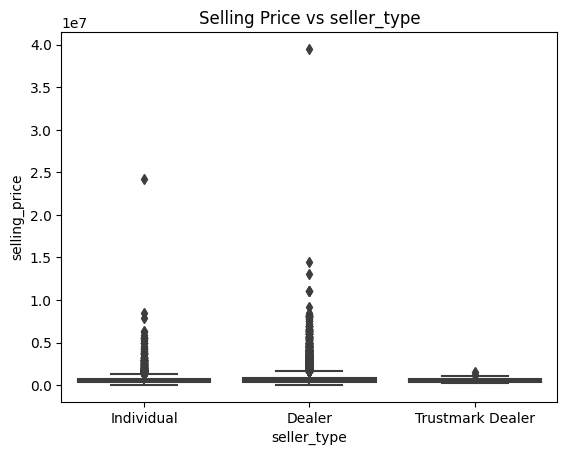

In [26]:
sns.boxplot(x='seller_type', y='selling_price', data=data)
plt.title('Selling Price vs seller_type')
plt.show()

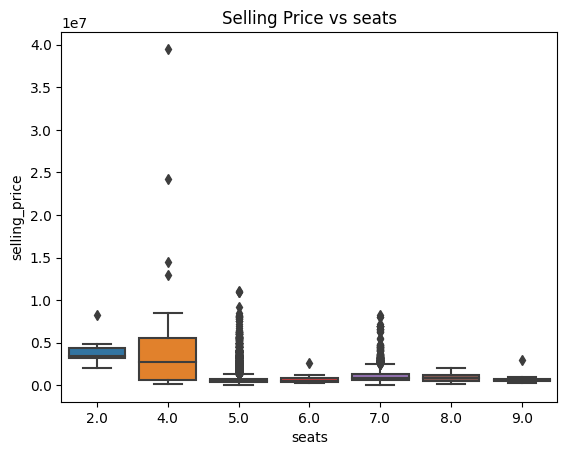

In [27]:
sns.boxplot(x='seats', y='selling_price', data=data)
plt.title('Selling Price vs seats')
plt.show()

Taking a look at the features individually definitely gives concern of a large number of outliers. 

However, I am worried that looking at these features individually misses more nuanced relationships in the data and we may be better off combining these features to understand the distribution of price according to combinations of dimensions. 

I have chosen to combine fuel type transmission type and seats as a single categorical feature and assess their distributions across brands. 

In [28]:
# combine all features across columns brand , fuel_type, transmission_type and seats

data['brand_fuel_transmission_seats'] = data['brand'] + '_' + data['fuel_type'] + '_' + data['transmission_type'] + '_' + data['seats'].astype(str)

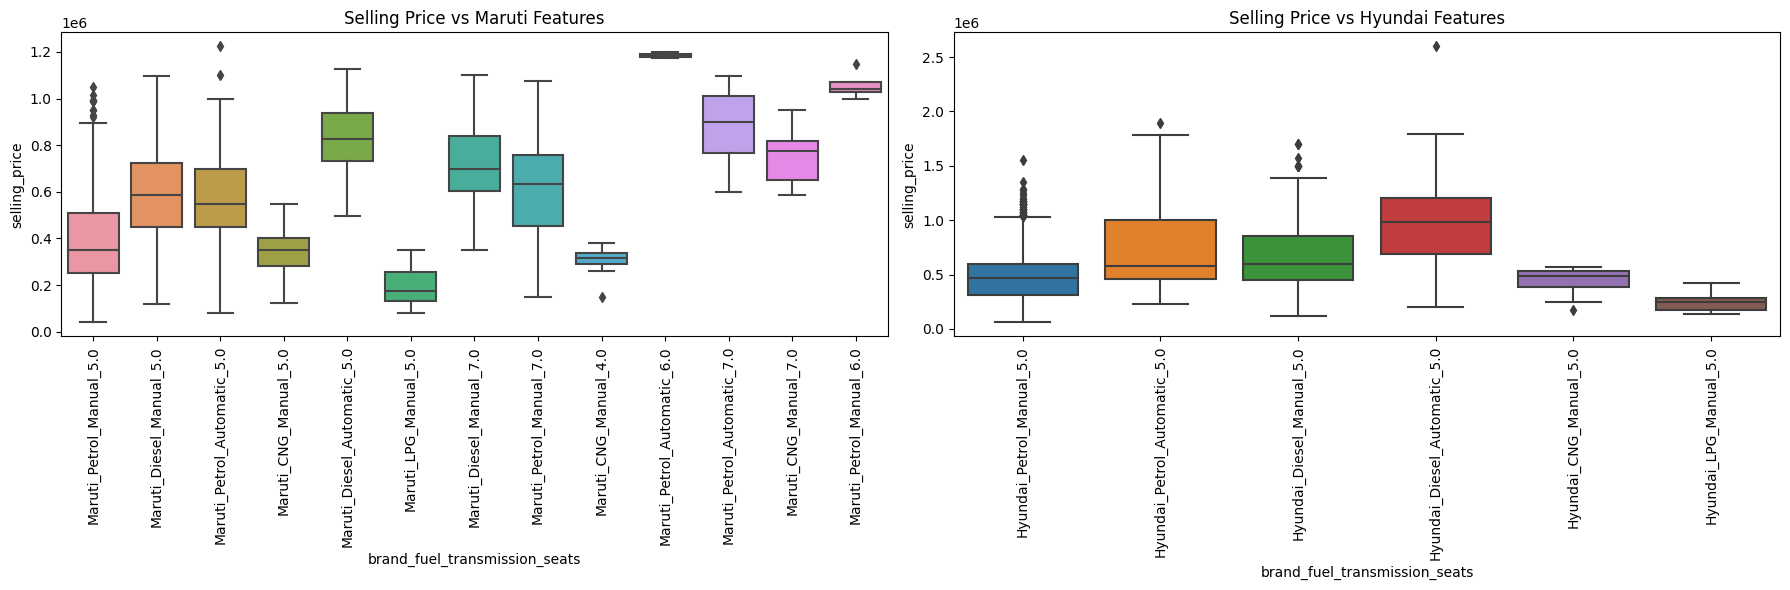

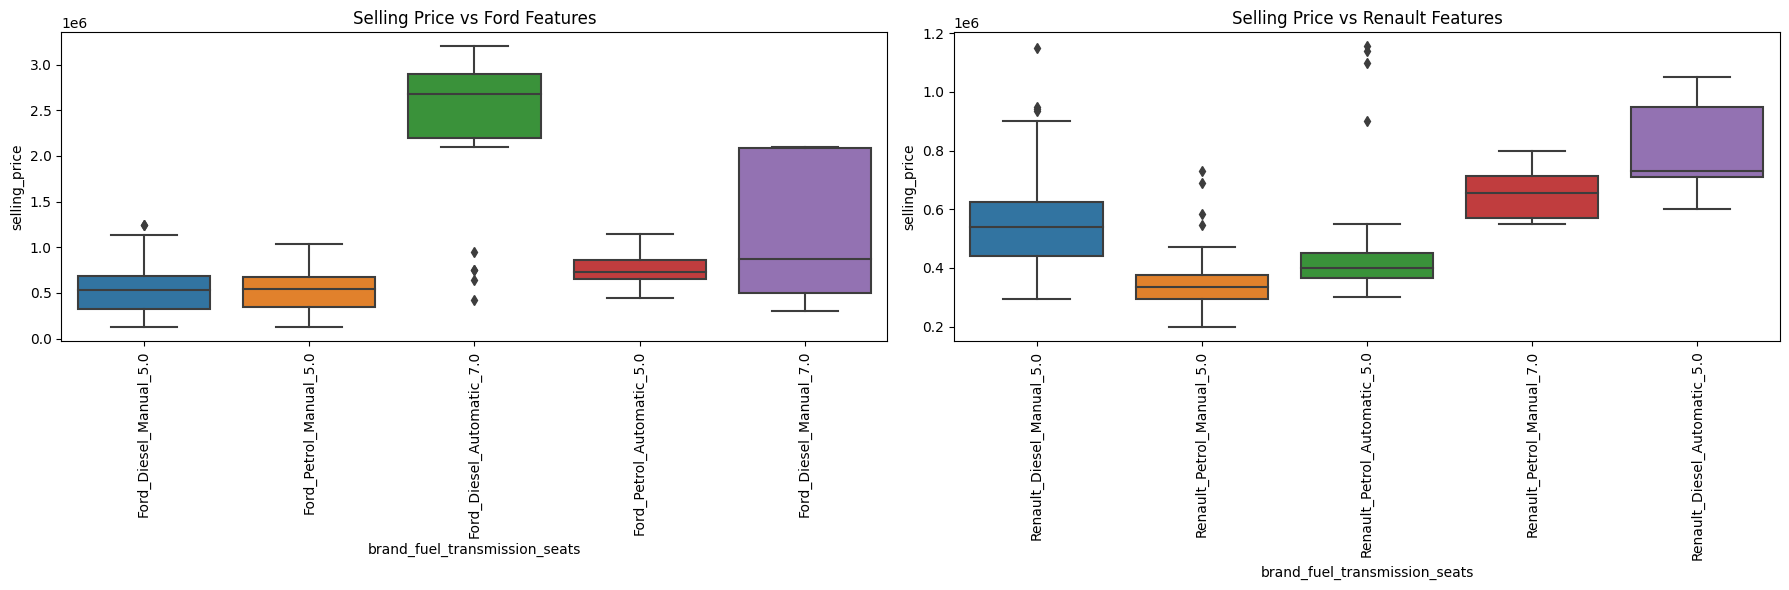

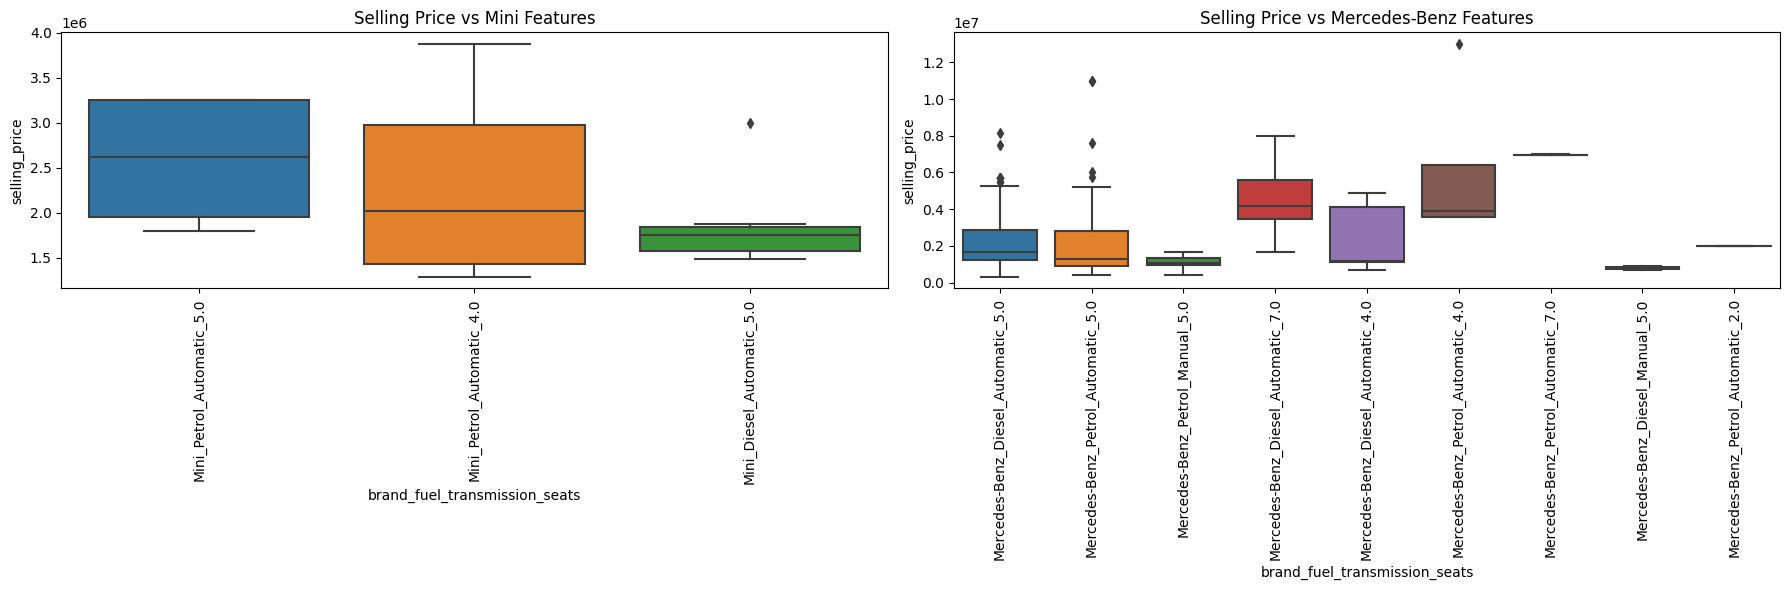

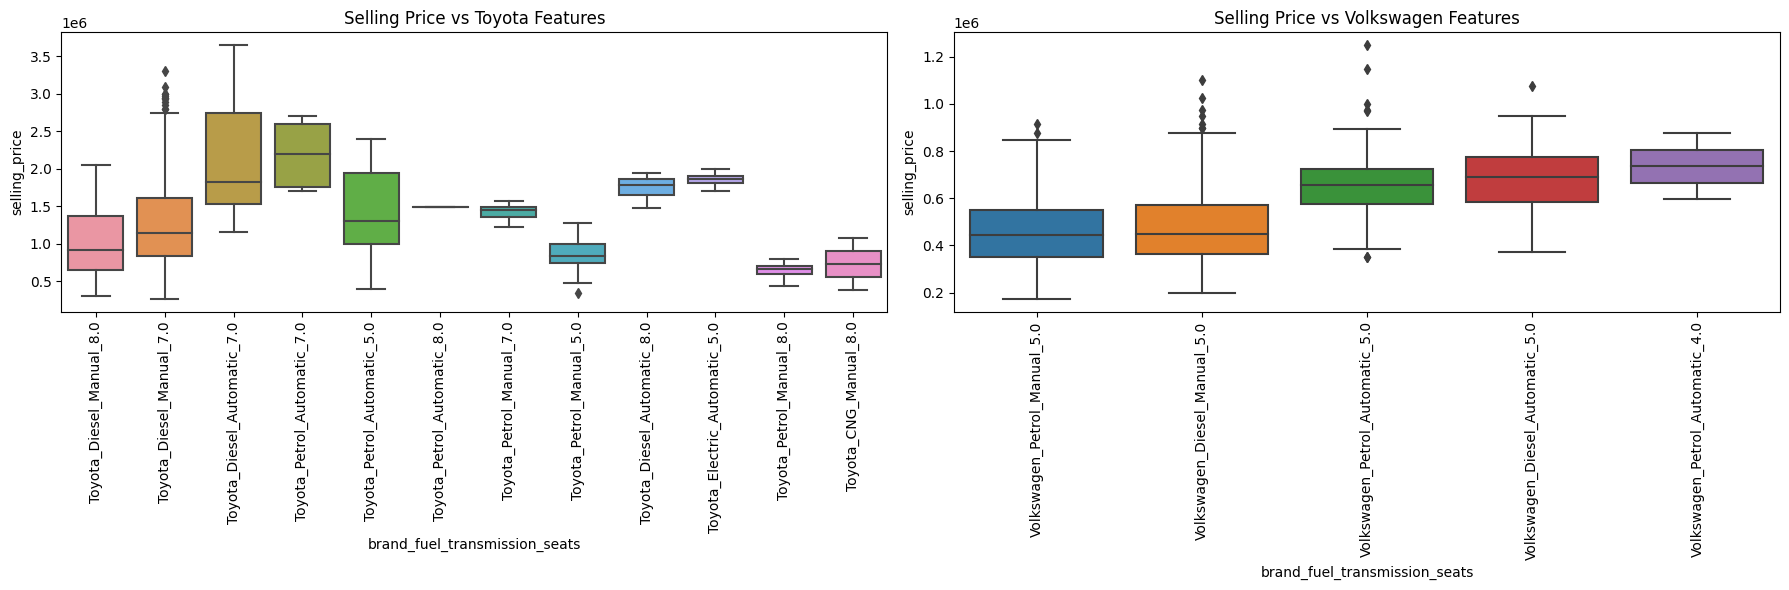

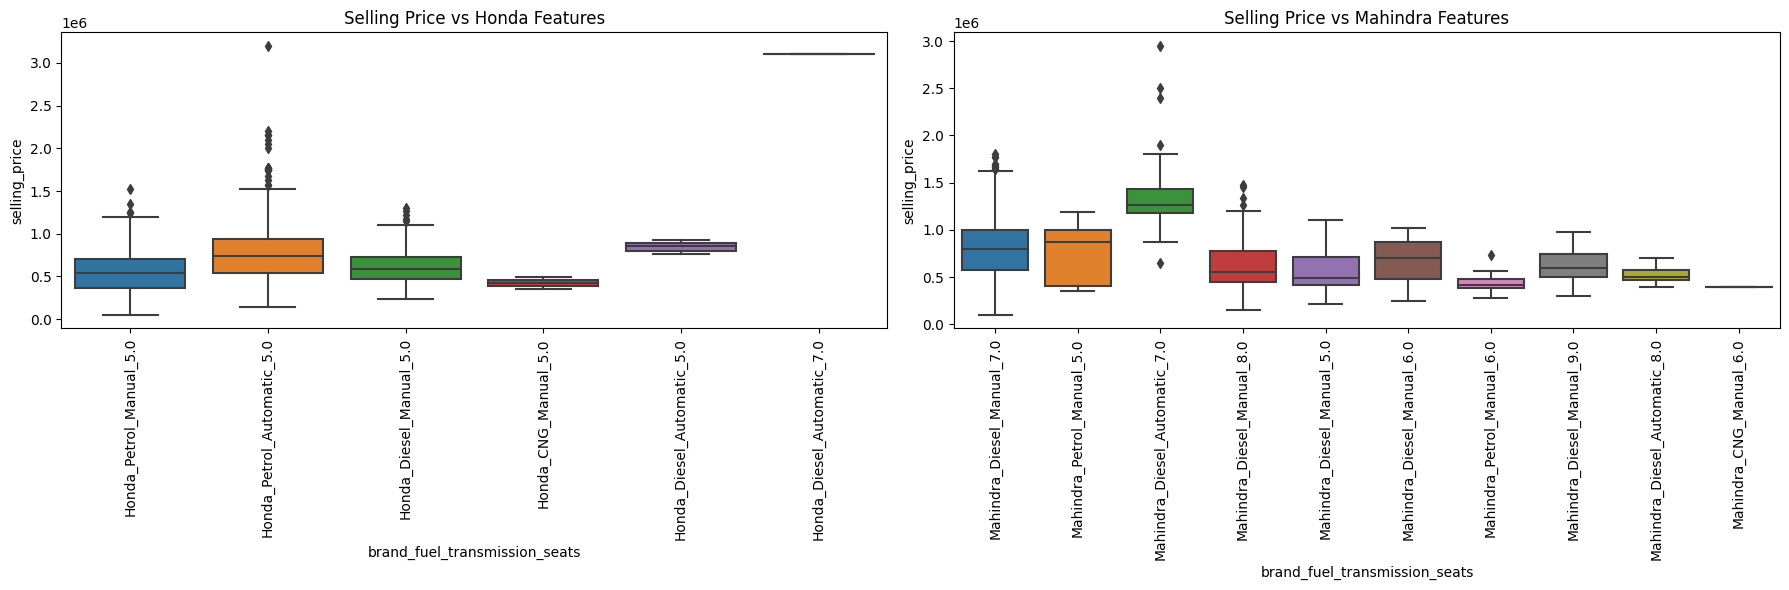

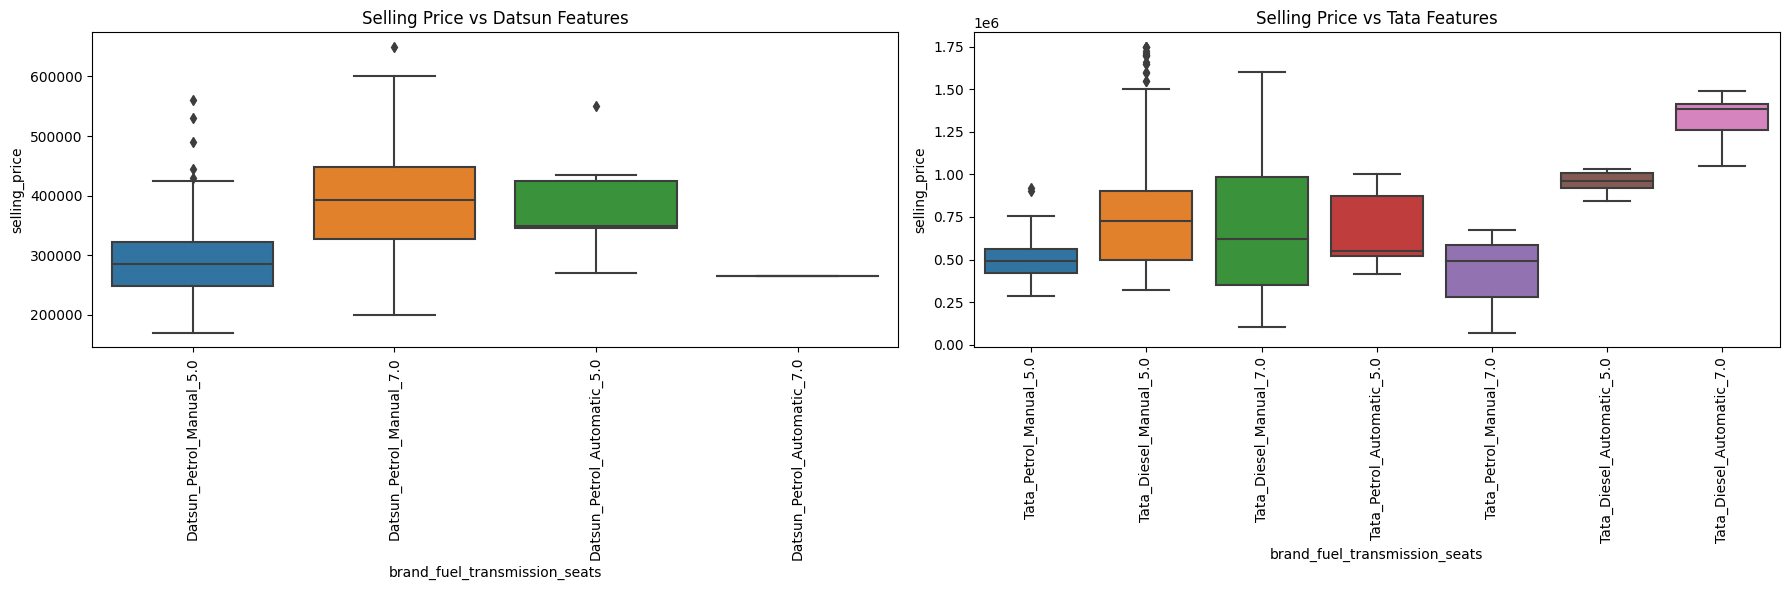

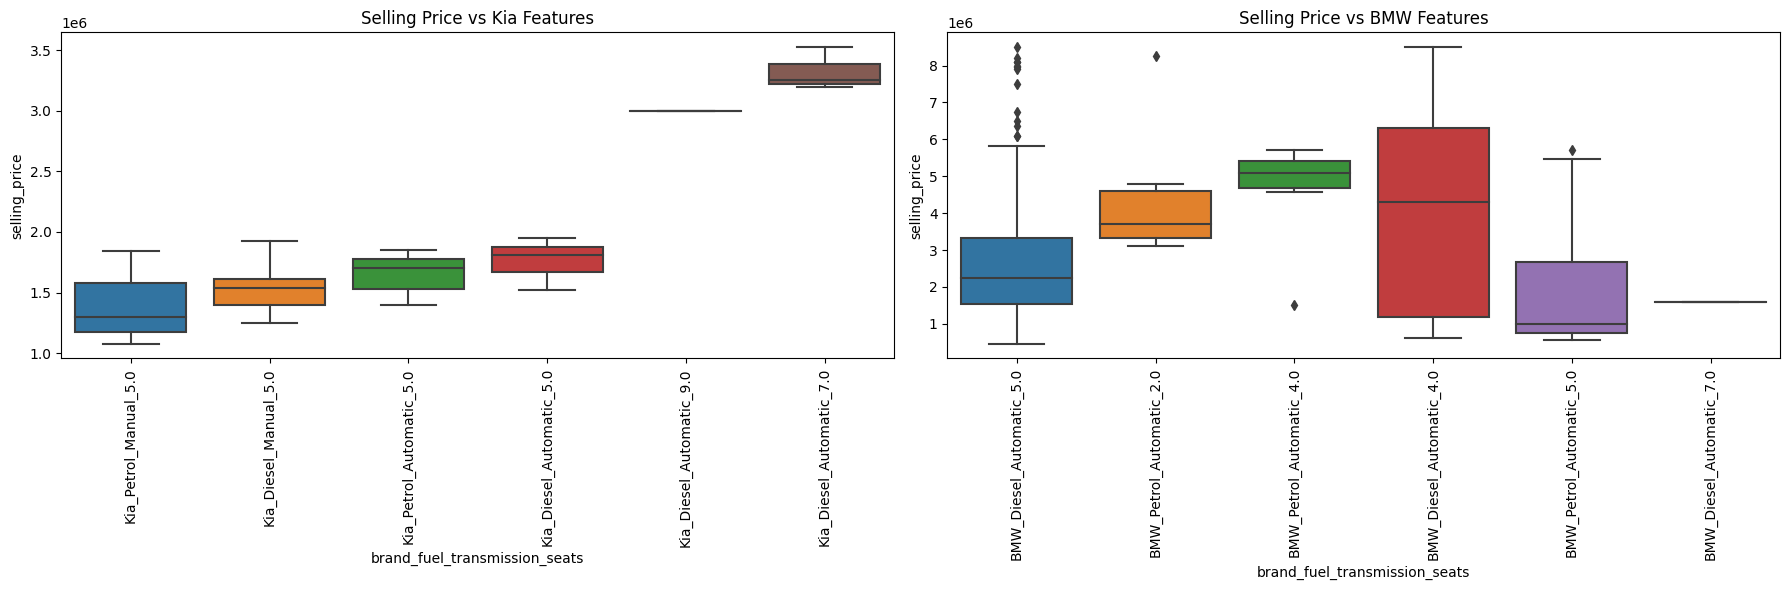

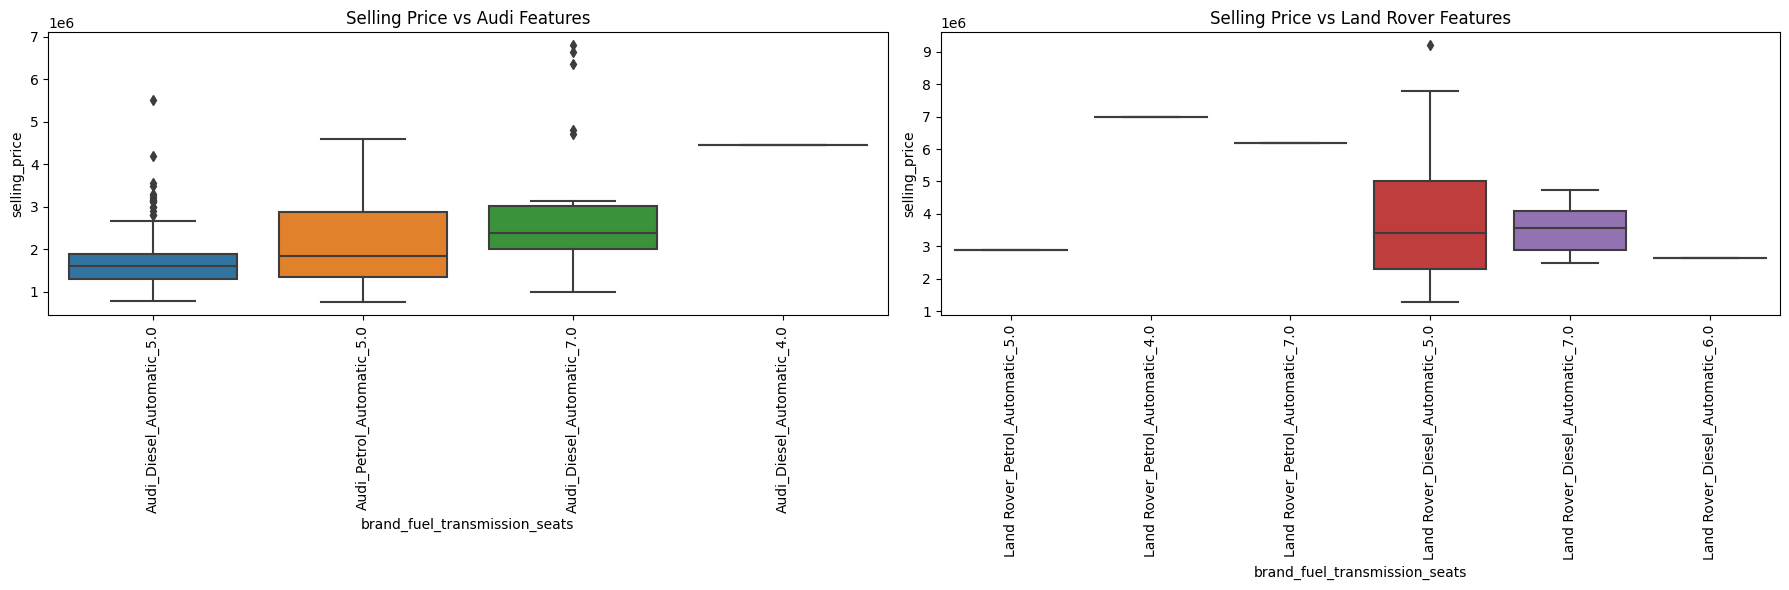

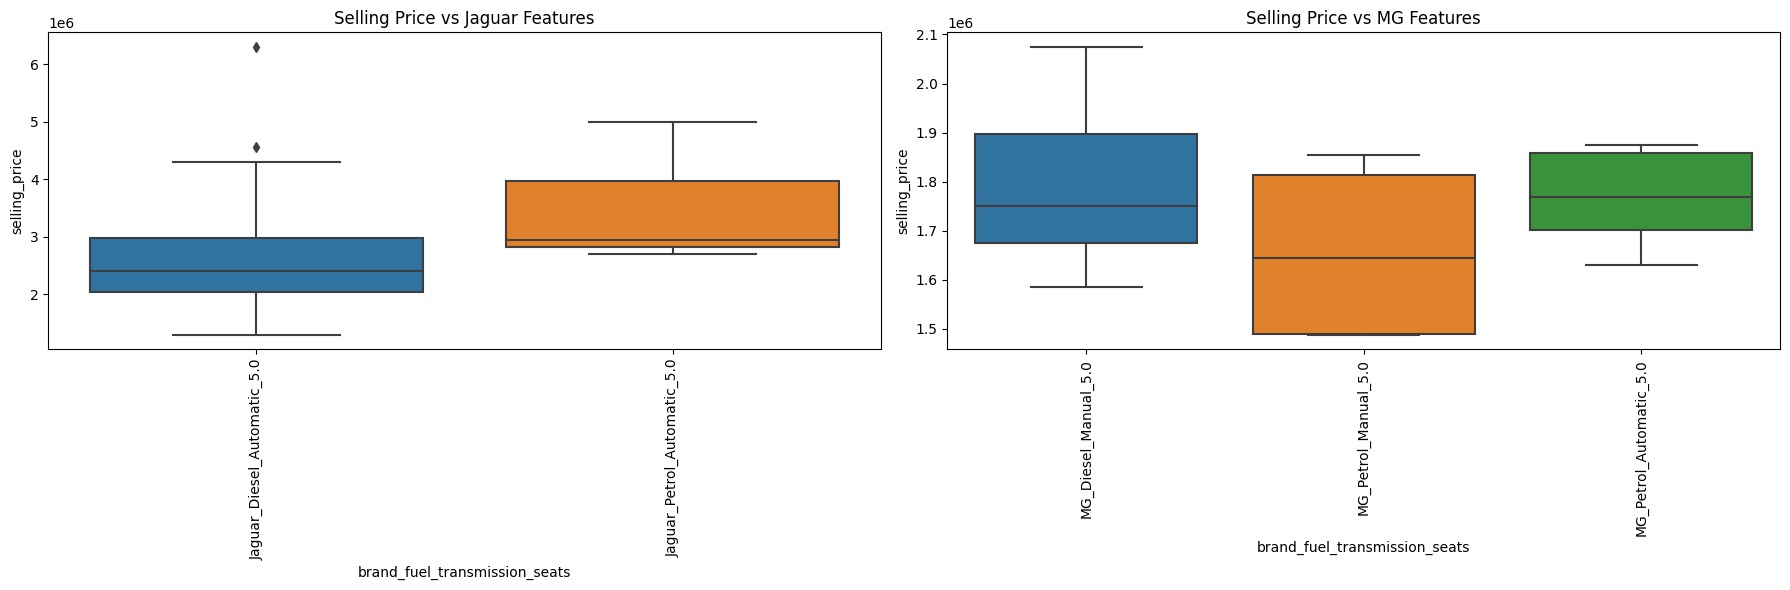

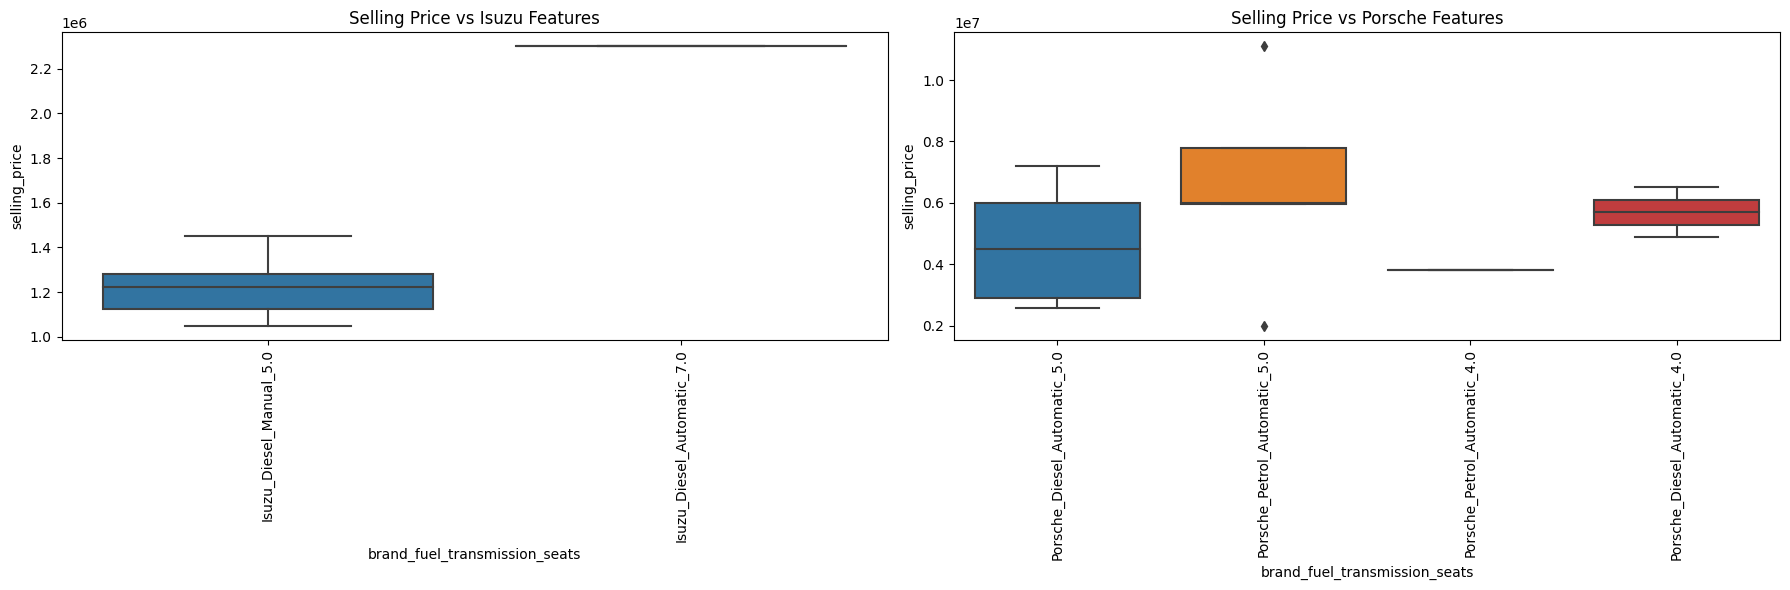

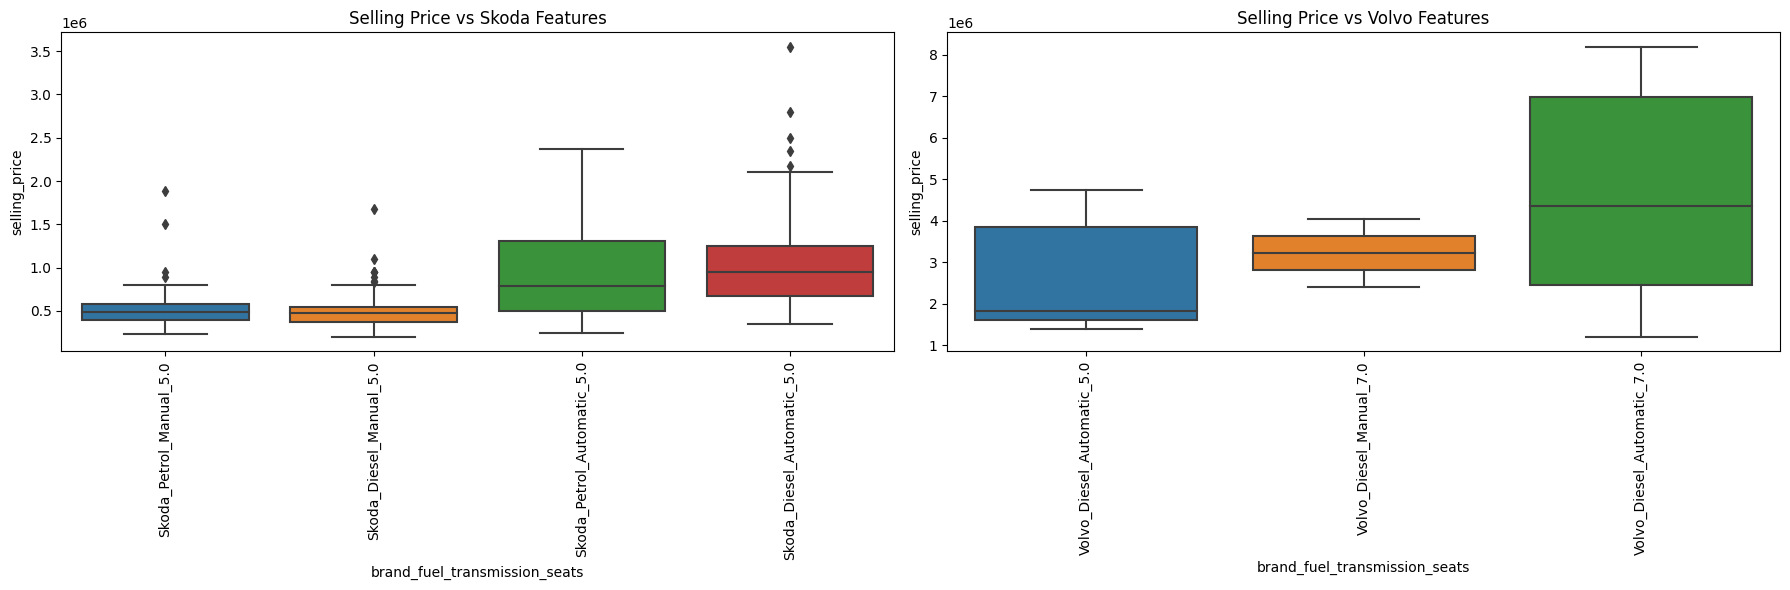

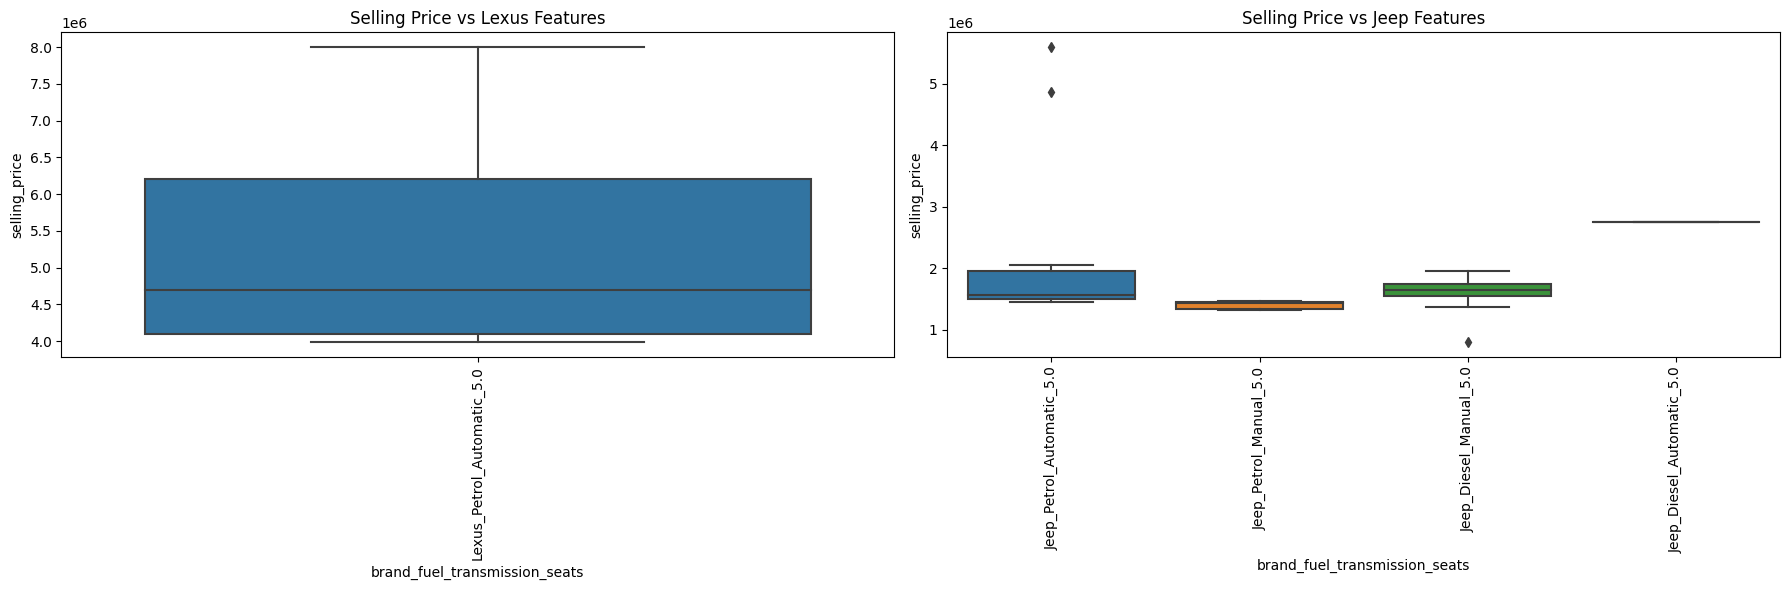

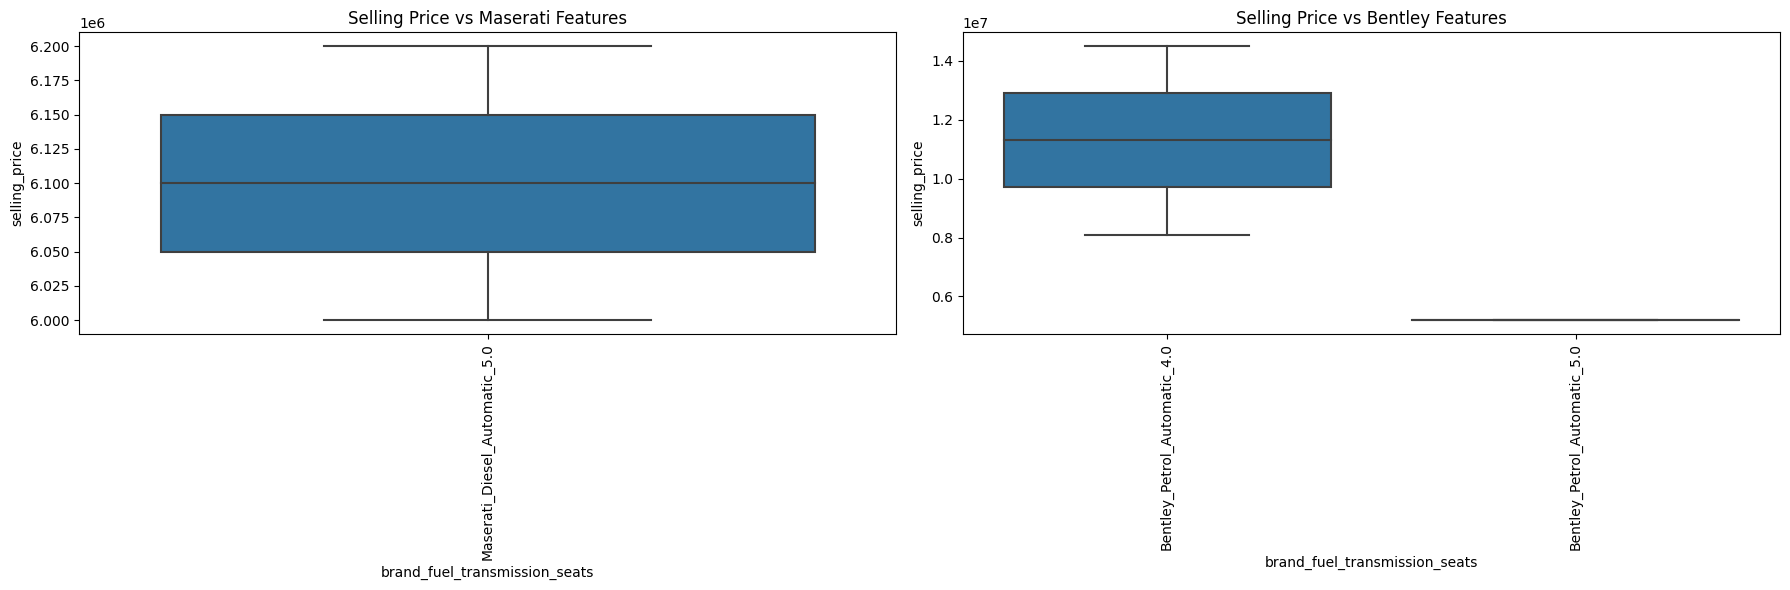

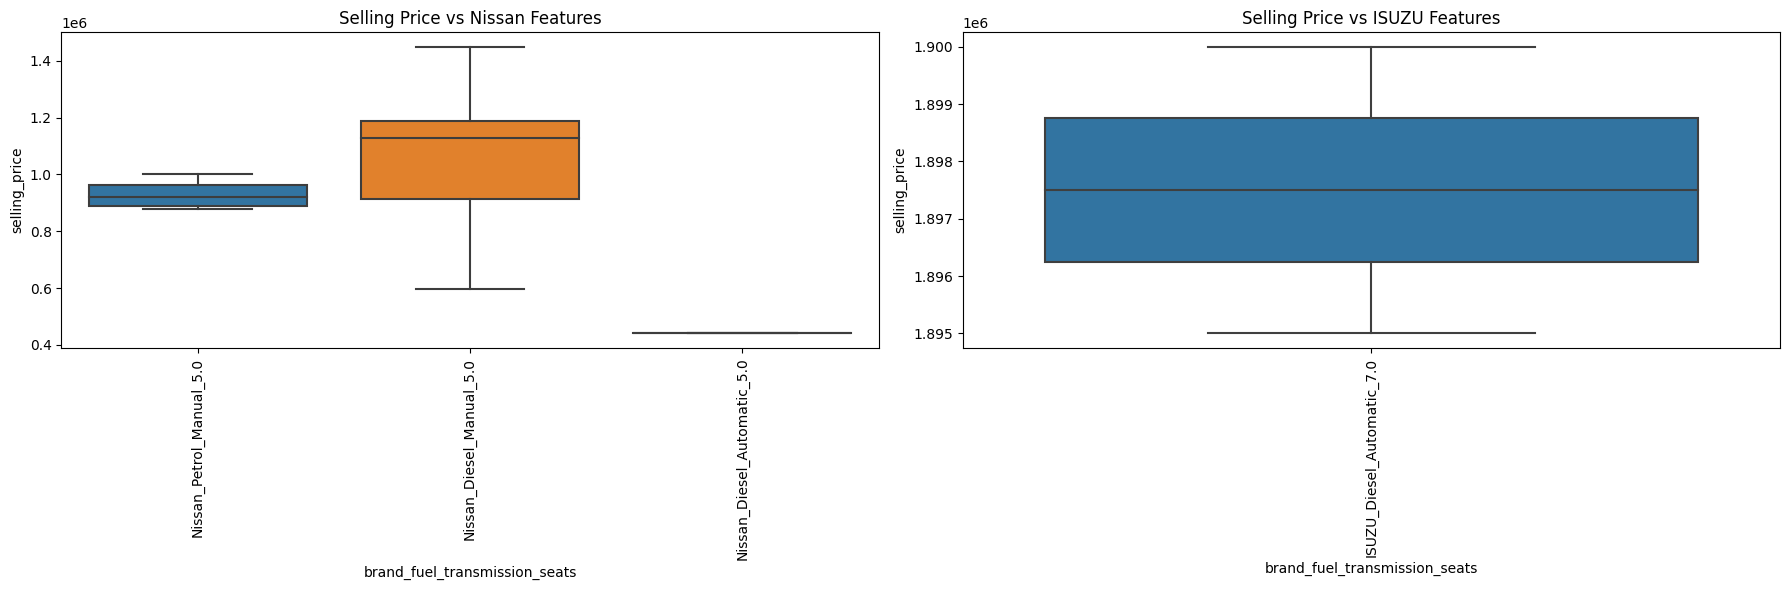

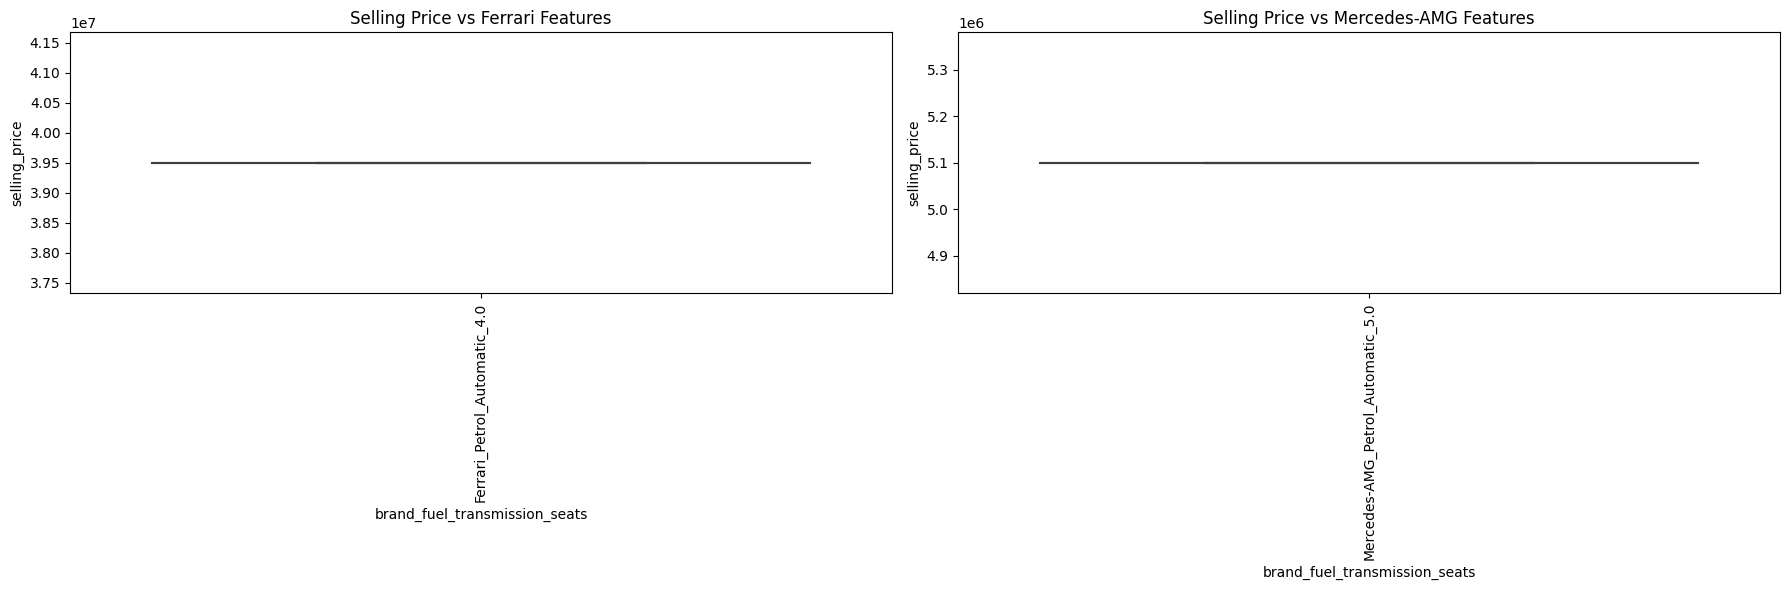

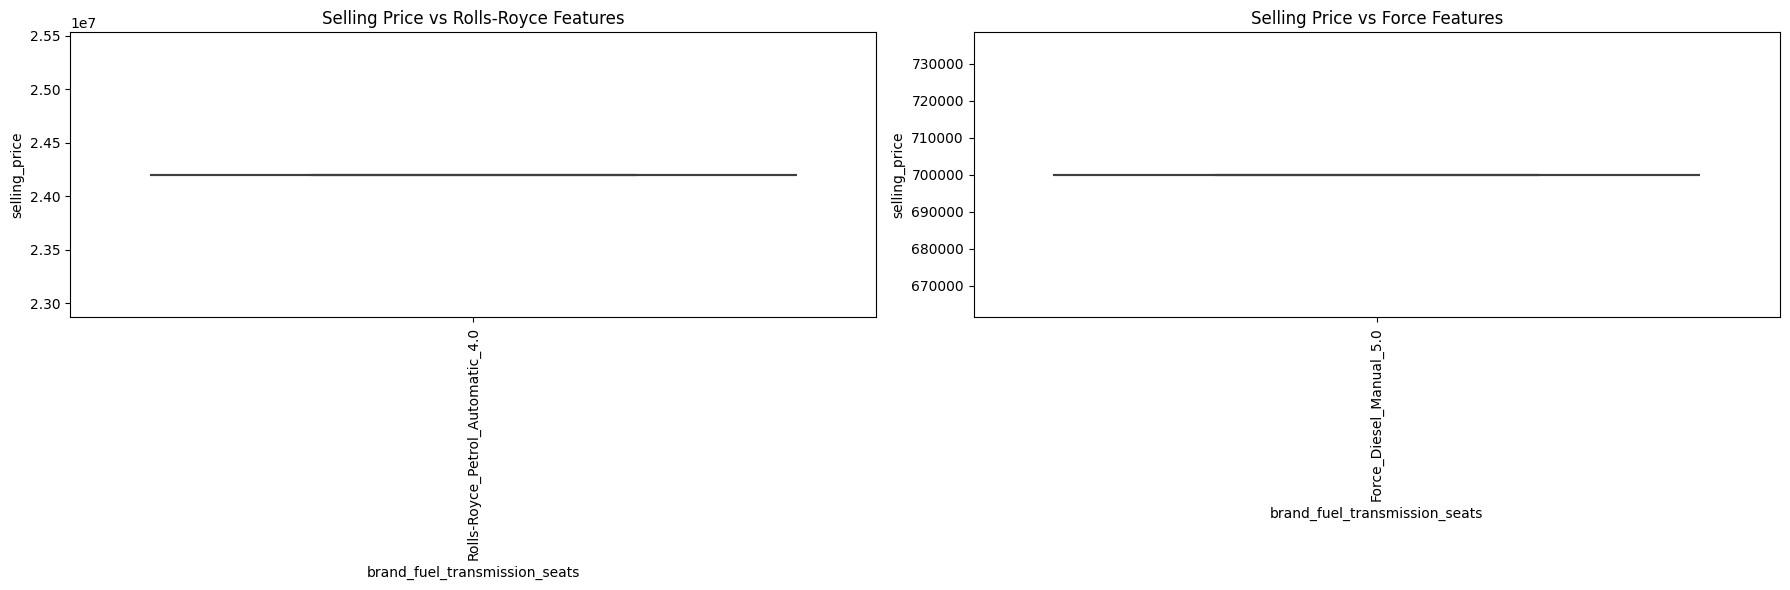

In [29]:
brands = data['brand'].unique()
num_brands = len(brands)

for i in range(0, num_brands, 2):
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))
    for j in range(2):
        if i + j < num_brands:
            brand = brands[i + j]
            sns.boxplot(
                x='brand_fuel_transmission_seats',
                y='selling_price',
                data=data[data['brand'] == brand],
                ax=axes[j]
            )
            axes[j].set_title(f'Selling Price vs {brand} Features')
            axes[j].set_xticklabels(axes[j].get_xticklabels(), rotation=90)
        else:
            axes[j].axis('off')
    plt.tight_layout()
    plt.show()

Taking a look at these plots highlights price deviations within essentially the same models which can be seen as anomolous and allows us to identify where potential listings may be over or under valued for the given model spec.

I will use these plots as the basis to remove outliers, this will help me preserve more complex interactions and valid price fluctuations between brands and spec while removing significant deviations from the normal price range.

#### IQR to Remove Outliers

The Interquartile Range (IQR) method is a robust statistical technique for detecting and removing outliers from a dataset. 

The IQR is calculated as the difference between the third quartile (Q3) and the first quartile (Q1), representing the middle 50% of the data. Outliers are typically defined as data points that fall below:

$( Q1 - 1.5 \times IQR )$ or above $( Q3 + 1.5 \times IQR )$

By removing these extreme values, we reduce the influence of anomalous data points, leading to more reliable statistical analysis and model performance. This method is especially useful because it is not affected by the presence of extreme values, making it suitable.

In [30]:
# for each brand and brand_fuel_transmission_seats remove outliers
# identify outlier indices based on IQR

def identify_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)].index

outlier_indices = []
for brand in data['brand'].unique():
    brand_data = data[data['brand'] == brand]
    for feature in brand_data['brand_fuel_transmission_seats'].unique():
        feature_data = brand_data[brand_data['brand_fuel_transmission_seats'] == feature]
        if not feature_data.empty:
            # identify outliers for the selling_price column
            outliers = identify_outliers_iqr(feature_data, 'selling_price')
            outlier_indices.extend(outliers.tolist())

In [31]:
len(outlier_indices)

269

In [32]:
print(f"Data count before removing outliers: {data.shape[0]}")
outliers_removed = data.drop(index=outlier_indices)
print(f"Data count after removing outliers: {outliers_removed.shape[0]}")

Data count before removing outliers: 15244
Data count after removing outliers: 14975


#### Local Outlier Factor (LOF) to Detect Outliers

The Local Outlier Factor (LOF) is an unsupervised anomaly detection method that identifies outliers by comparing the local density of a data point to that of its neighbors. 

A data point is considered an outlier if its density is significantly lower than that of its neighbors, indicating it is isolated or different from the majority. LOF is particularly effective for detecting outliers in datasets with complex, non-linear distributions, as it adapts to local variations in density. This makes it a powerful tool for identifying subtle anomalies that may not be detected by global methods like IQR.

In this dataset, we want to account for complex non-linear relationships that may exist, a particular value may seem to be an outlier when assessed in a univariate distribution, however when factoring in other dimensions it may not be so, as seen above in the categorical exploration.

In [33]:
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
numerical_columns = data.loc[:,['vehicle_age','km_driven', 'mileage', 
                               'engine', 'max_power', 'selling_price']]
outlier_indices_lof = lof.fit_predict(numerical_columns)
outlier_indices_lof = np.where(outlier_indices_lof == -1)[0]
print(f"Number of outliers identified by LOF: {len(outlier_indices_lof)}")

Number of outliers identified by LOF: 763


In [34]:
print(f"Data count before removing outliers: {data.shape[0]}")
outliers_removed = data.drop(index=outlier_indices_lof)
print(f"Data count after removing outliers: {outliers_removed.shape[0]}")

Data count before removing outliers: 15244
Data count after removing outliers: 14481


In [35]:
# merge indices
print(f"Data count before removing outliers: {data.shape[0]}")
outlier_indices_combined = set(outlier_indices) | set(outlier_indices_lof)
outliers_removed_combined = data.drop(index=outlier_indices_combined)
print(f"Data count after removing outliers: {outliers_removed_combined.shape[0]}")

Data count before removing outliers: 15244
Data count after removing outliers: 14221


#### 3.4 Add python comments to explain the observations.

I have chosen a multi-dimensional approach to addressing potential outliers that may exist within both categorical variables as well as complex low density areas that may exist when assessing multiple continuous distributions. 

I am surprised by the number of values that were removed by LOF, however overall, the number of values removed is very low in comparison to the overall sample size and will help us focus on the general distribution of price across vehicles. 

### Section 4: Data Analysis

In [36]:
outliers_removed_combined.reset_index(drop=True, inplace=True)

#### 4.1 Univariate Analysis of numeric features: Generate histograms for numerical data and infer insights from these visualizations.

#### 4.2 Examine the skewness in the data and apply appropriate data transformation technique.  

In [37]:
outliers_removed_combined['km_driven_per_year'] = outliers_removed_combined['km_driven']/(outliers_removed_combined['vehicle_age'] + 1)

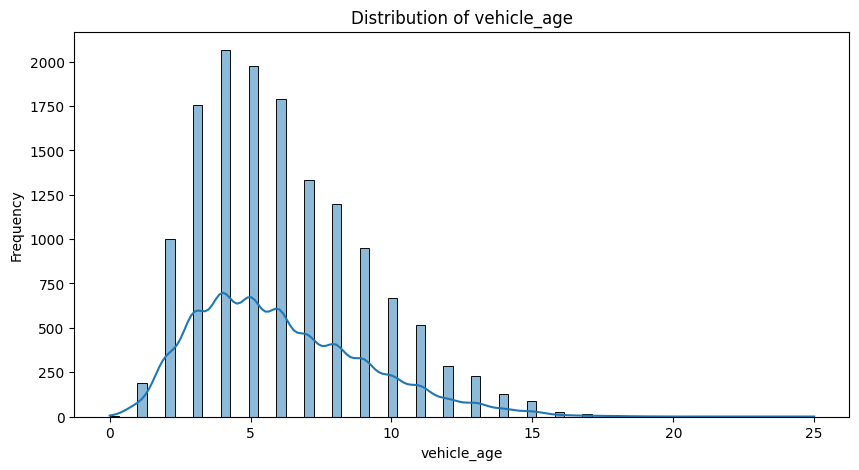

vehicle_age - Mean: 6.084311933056747, Median: 6.0, Mode: 4, Skewness: 0.7961635824631177


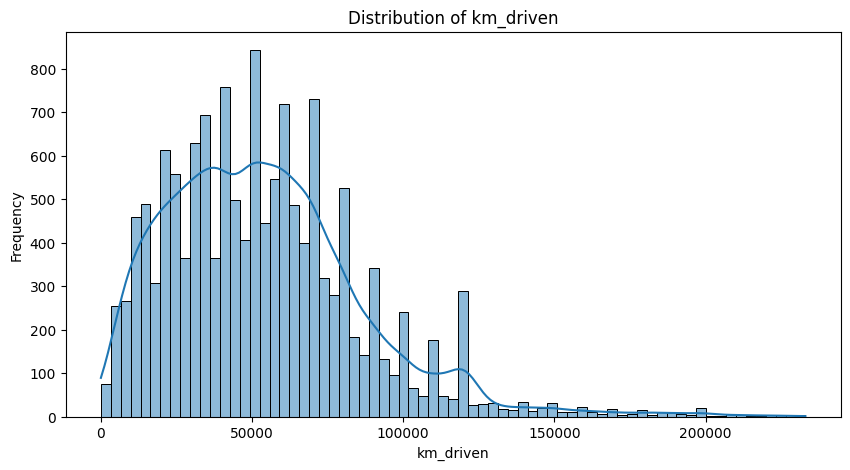

km_driven - Mean: 54023.41171506926, Median: 50000.0, Mode: 50000, Skewness: 1.1009236947923522


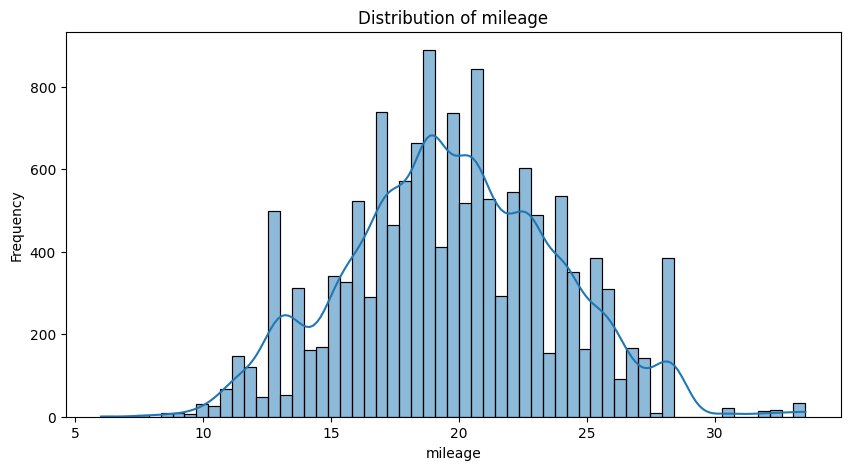

mileage - Mean: 19.78092609521131, Median: 19.7, Mode: 18.9, Skewness: 0.10433838577766798


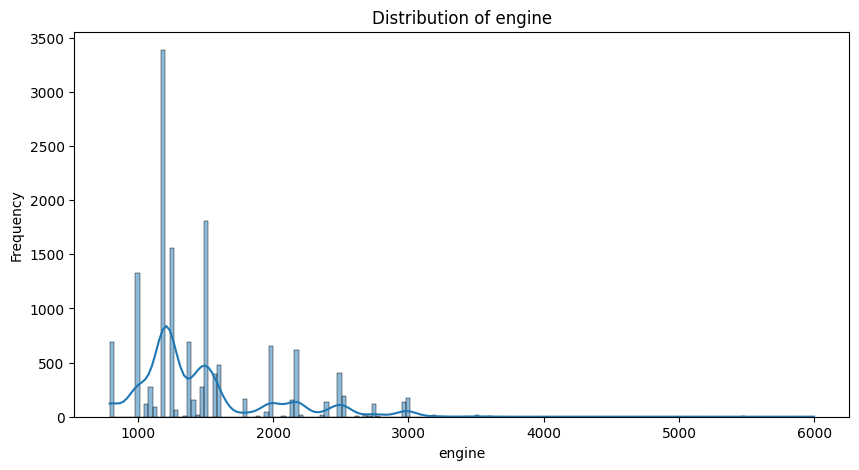

engine - Mean: 1472.010407144364, Median: 1248.0, Mode: 1197, Skewness: 1.5817643077123344


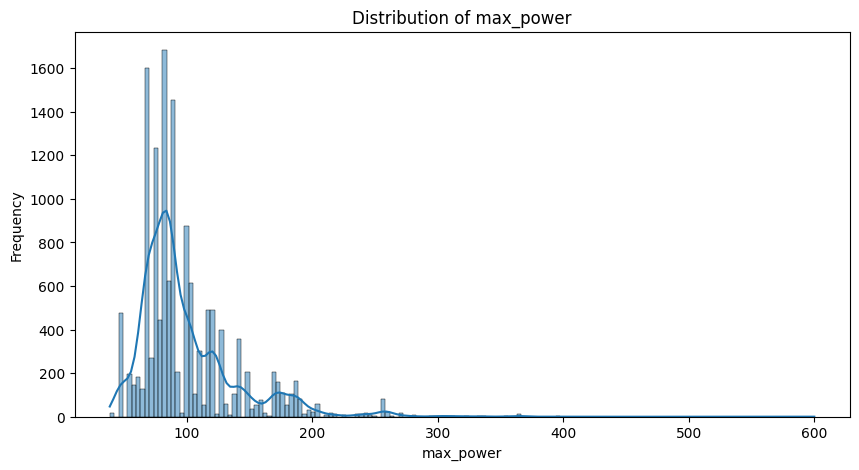

max_power - Mean: 99.4266549469095, Median: 88.5, Mode: 74.0, Skewness: 2.2088667525784187


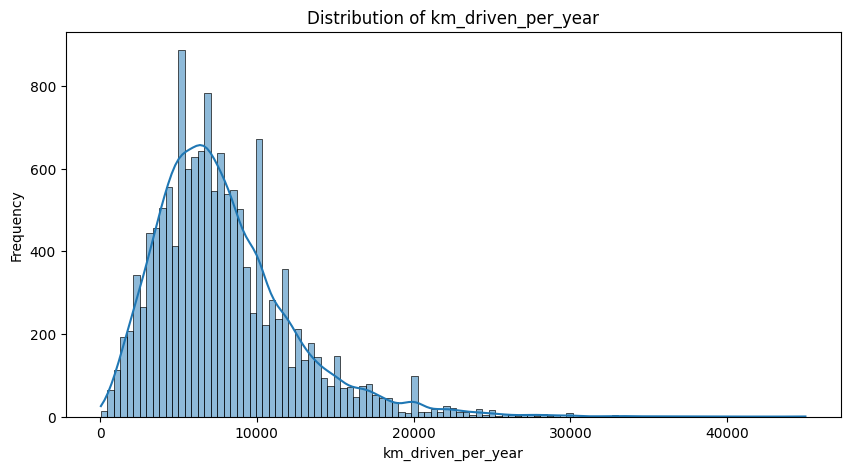

km_driven_per_year - Mean: 7852.401765289064, Median: 7064.0, Mode: 10000.0, Skewness: 1.3993917958030264


In [38]:
for column in outliers_removed_combined.select_dtypes(include=[np.number]).columns:
    if column in ['selling_price', 'seats']:
        continue  # Skip selling_price as we are already analyzing it separately
    plt.figure(figsize=(10, 5))
    sns.histplot(outliers_removed_combined[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()
    
    mean = outliers_removed_combined[column].mean()
    median = outliers_removed_combined[column].median()
    mode = outliers_removed_combined[column].mode()[0]
    skewness = outliers_removed_combined[column].skew()
    
    print(f"{column} - Mean: {mean}, Median: {median}, Mode: {mode}, Skewness: {skewness}")

Most numeric features in this sample have some significant positive skew (> 0.5).

It is interesting to note that most of the distributions are very close to normal when evaluating their descriptive statistics and within the visual inspection, we can observe a close to bell shaped curve.

We should using some transformation techniques be able to get this shape closer to normal using a standard log transform for those with significant skew, which can be tested next.

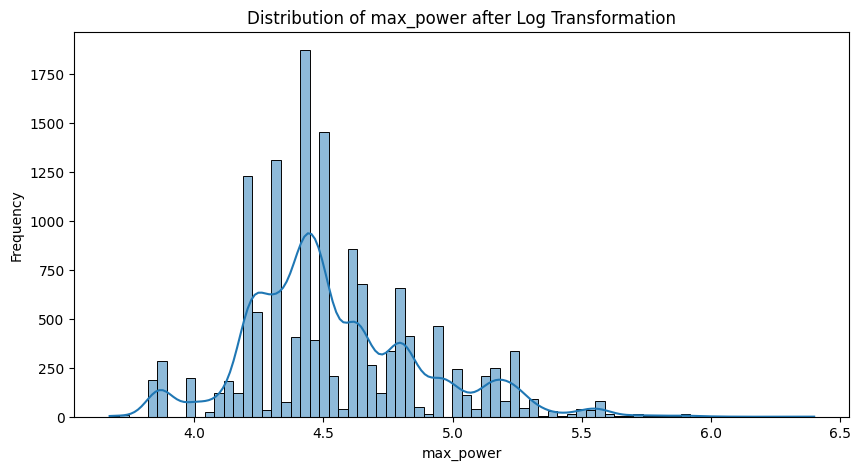

max_power - Mean: 4.544331741315781, Median: 4.4942386252808095, Mode: 4.31748811353631, Skewness: 0.7370881597675474


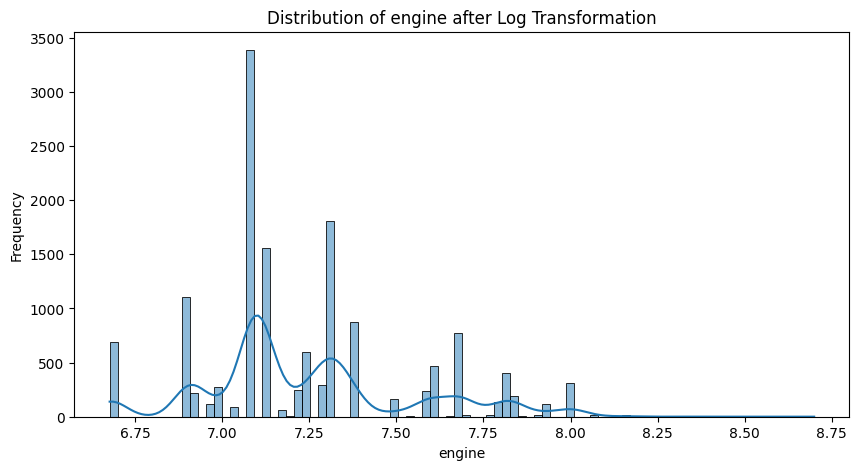

engine - Mean: 7.245724006330207, Median: 7.130098510125578, Mode: 7.088408778675395, Skewness: 0.6821103828420114


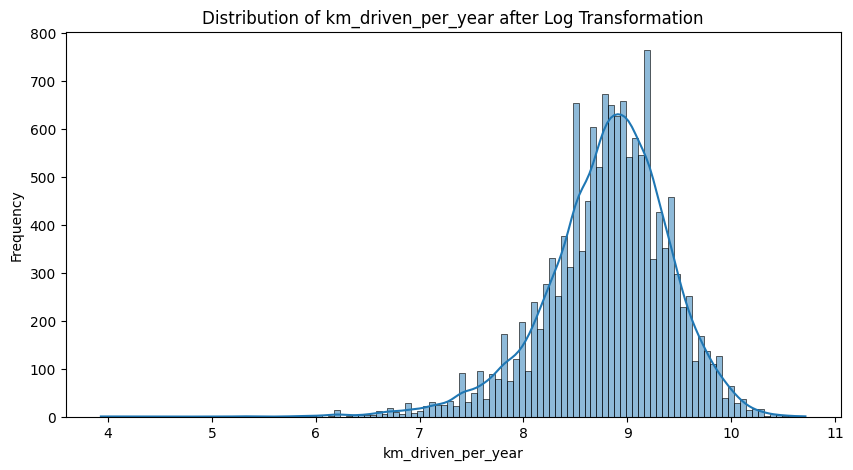

km_driven_per_year - Mean: 8.81092519948331, Median: 8.862908295118627, Mode: 9.210440366976517, Skewness: -0.7487356983620864


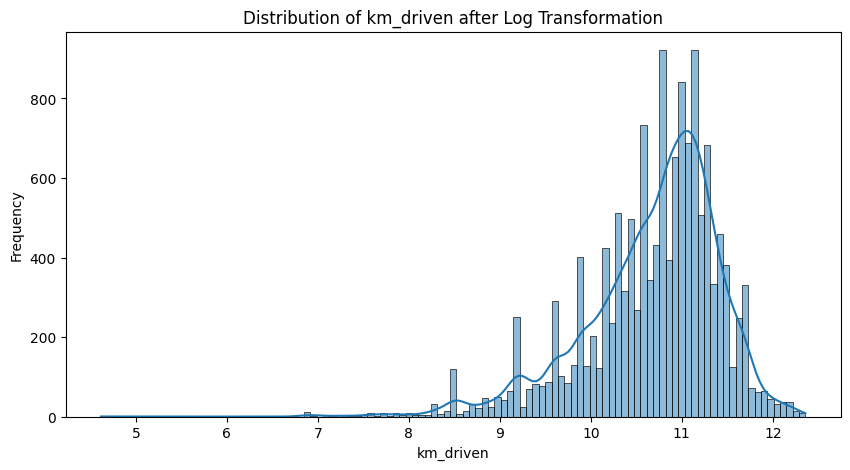

km_driven - Mean: 10.67780510801966, Median: 10.819798284210286, Mode: 10.819798284210286, Skewness: -1.1142129973483048


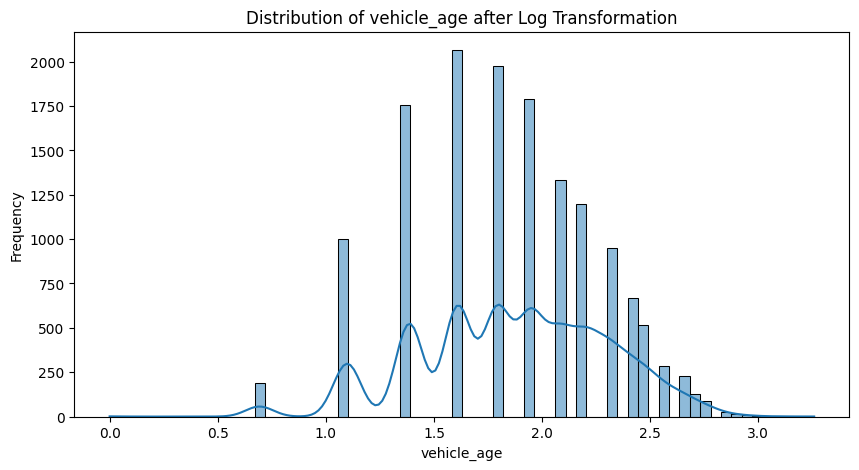

vehicle_age - Mean: 1.867031195033685, Median: 1.9459101490553132, Mode: 1.6094379124341003, Skewness: -0.22203165954005352


In [39]:
# log transformation of skewed features >= 0.5 or <= -0.5
skewed_features = outliers_removed_combined.select_dtypes(include=[np.number]).apply(lambda x: x.skew()).sort_values(ascending=False)
skewed_features = skewed_features[abs(skewed_features) >= 0.5]
# first creating temporary DataFrame for skewed features to evaluate before committing to changes
skewed_df = outliers_removed_combined.loc[:,skewed_features.index]
for feature in skewed_features.index:
    skewed_df[feature] = np.log1p(skewed_df[feature])
# visualize distribution of numeric features vs selling price after log transformation
for column in skewed_df.select_dtypes(include=[np.number]).columns:
    if column in ['selling_price', 'seats']:
        continue  # Skip seats as we are analyzing this as a categorical feature
    plt.figure(figsize=(10, 5))
    sns.histplot(skewed_df[column], kde=True)
    plt.title(f'Distribution of {column} after Log Transformation')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()
    
    mean = skewed_df[column].mean()
    median = skewed_df[column].median()
    mode = skewed_df[column].mode()[0]
    skewness = skewed_df[column].skew()
    
    print(f"{column} - Mean: {mean}, Median: {median}, Mode: {mode}, Skewness: {skewness}")

The skewness for most numeric features is looking better post transformation, however KM Driven appears to have shifted skewness to the negative. 

In an attempt to better cater for this, I am going to try a different transformation technique, such as yeo-johnson and observe if it handles the skewness better.

### Yeo-Johnson Transformation

The Yeo-Johnson transformation is a statistical technique used to stabilize variance and make data more normally distributed. Unlike the Box-Cox transformation, it can be applied to both positive and negative values.

The Yeo-Johnson transformation for a variable $( y )$ and parameter $( \lambda )$ is defined as:

\[
$Y(y; \lambda)$ = 
\begin{cases}
\frac{(y + 1)^\lambda - 1}{\lambda}, & \text{if } y \geq 0, \lambda \neq 0 \\\\
\log(y + 1), & \text{if } y \geq 0, \lambda = 0 \\\\
-\frac{(-y + 1)^{2 - \lambda} - 1}{2 - \lambda}, & \text{if } y < 0, \lambda \neq 2 \\\\
-\log(-y + 1), & \text{if } y < 0, \lambda = 2
\end{cases}
\]

In [40]:
pt = PowerTransformer(method='yeo-johnson')
# fit_transform returns a 2D array, so we flatten it to a Series and align the index with outliers_removed_combined
transformed_km_driven = pd.DataFrame(
    pt.fit_transform(outliers_removed_combined[['km_driven', 'km_driven_per_year']]),
    columns=['km_driven', 'km_driven_per_year'],
    index=outliers_removed_combined.index
)

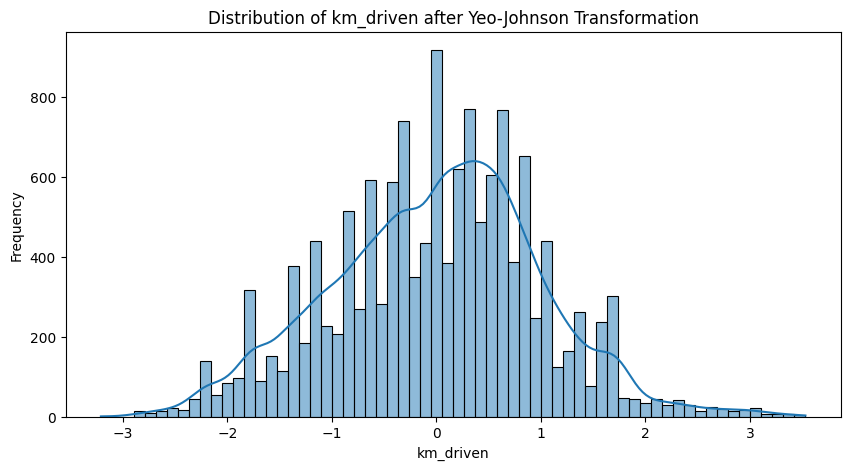

Descriptive statistics for km_driven after Yeo-Johnson transformation:
Mean: 6.795148868811872e-17
Median: 0.04810410877456009
Mode: 0.04810410877456009
Skewness: -0.016175323850655392



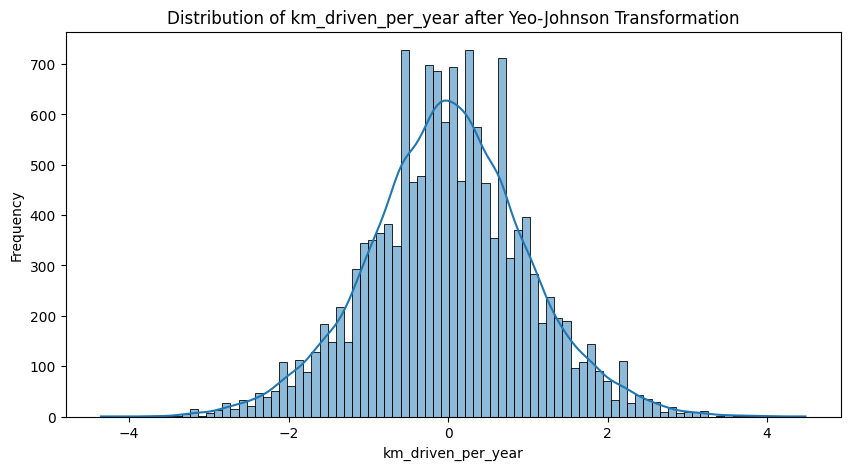

Descriptive statistics for km_driven_per_year after Yeo-Johnson transformation:
Mean: -1.1991439180256244e-17
Median: -0.005414573199110247
Mode: 0.6448064864170918
Skewness: 0.02512639579690157



In [41]:
for col in transformed_km_driven.columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(transformed_km_driven[col], kde=True)
    plt.title(f'Distribution of {col} after Yeo-Johnson Transformation')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

    mean = transformed_km_driven[col].mean()
    median = transformed_km_driven[col].median()
    mode_series = transformed_km_driven[col].mode()
    mode = mode_series.iloc[0] if not mode_series.empty else np.nan
    skew = transformed_km_driven[col].skew()

    print(f"Descriptive statistics for {col} after Yeo-Johnson transformation:")
    print(f"Mean: {mean}")
    print(f"Median: {median}")
    print(f"Mode: {mode}")
    print(f"Skewness: {skew}\n")

The skewness value after Yeo-Johnson transformation is looking a lot better and the overall distribution is looking more normal in shape.

After this evaluation we apply the transformations informed by the previous analysis to the numeric data

In [42]:
# apply log transformation to all numerical features but apply yeo-johnson transformation to km_driven
numeric_features = ['mileage', 'max_power', 'vehicle_age', 'km_driven', 'km_driven_per_year', 'engine']

numeric_df = outliers_removed_combined.loc[:,numeric_features]

for column in numeric_df.columns:
    if np.abs(numeric_df[column].skew()) < 0.5:
        # if skewness is less than 0.5, no transformation needed
        continue
    elif column in ['km_driven', 'km_driven_per_year']:
        # apply Yeo-Johnson transformation to km_driven as per previous analysis
        numeric_df[column] = pt.fit_transform(numeric_df[[column]])
    else:
        # apply log transformation
        numeric_df[column] = np.log1p(numeric_df[column])

numeric_df.reset_index(drop=True, inplace=True)

In [43]:
numeric_df

mileage  max_power  vehicle_age  km_driven  km_driven_per_year   
0        19.70   3.856510     2.302585   1.730281            1.016355  \
1        18.90   4.418841     1.791759  -1.127253           -1.183332   
2        17.00   4.394449     2.484907   0.345799           -0.583134   
3        20.92   4.220977     2.302585  -0.392898           -1.036316   
4        22.77   4.601062     1.945910  -0.666477           -0.820669   
...        ...        ...          ...        ...                 ...   
14216    18.90   4.418841     1.791759  -1.803159           -2.130597   
14217    19.81   4.234831     2.302585  -1.689808           -2.497418   
14218    17.50   4.522875     1.098612  -1.233799           -0.286413   
14219    21.14   4.649378     1.945910   0.538254            0.558769   
14220    18.00   4.775756     1.098612  -1.532611           -0.804035   

         engine  
0      6.680855  
1      7.088409  
2      7.088409  
3      6.906755  
4      7.312553  
...         ...  
14216  7.088409  
14217  6.991177  
14218  7.225481  
14219  7.312553  
14220  7.311886  

[14221 rows x 6 columns]

In [44]:
numeric_df.skew()

mileage               0.104338
max_power             0.737088
vehicle_age          -0.222032
km_driven            -0.016175
km_driven_per_year    0.025126
engine                0.682110
dtype: float64

In [45]:
numeric_df.describe().round(3)

mileage  max_power  vehicle_age  km_driven  km_driven_per_year   
count  14221.000  14221.000    14221.000  14221.000           14221.000  \
mean      19.781      4.544        1.867      0.000              -0.000   
std        4.125      0.345        0.434      1.000               1.000   
min        6.000      3.674        0.000     -3.209              -4.354   
25%       17.000      4.317        1.609     -0.666              -0.595   
50%       19.700      4.494        1.946      0.048              -0.005   
75%       22.700      4.766        2.197      0.617               0.645   
max       33.540      6.399        3.258      3.530               4.480   

          engine  
count  14221.000  
mean       7.246  
std        0.304  
min        6.677  
25%        7.088  
50%        7.130  
75%        7.367  
max        8.699

#### 4.3 Apply appropriate standardization method wherever applicable.

The mean, median and mode of each feature are very similar for each feature indicating that the data is very close to normally distributed after transformation.

Thus I am going to apply a standard scalar to all features

In [46]:
scaler = StandardScaler()
# fit_transform returns a 2D array, so we convert it to a DataFrame and
# align the index with numeric_df
scaled_numeric_df = pd.DataFrame(
    scaler.fit_transform(numeric_df),
    columns=numeric_df.columns,
    index=numeric_df.index
)

In [47]:
scaled_numeric_df

mileage  max_power  vehicle_age  km_driven  km_driven_per_year   
0     -0.019620  -1.992342     1.003141   1.730281            1.016355  \
1     -0.213578  -0.363497    -0.173361  -1.127253           -1.183332   
2     -0.674227  -0.434149     1.423053   0.345799           -0.583134   
3      0.276165  -0.936628     1.003141  -0.392898           -1.036316   
4      0.724691   0.164324     0.181669  -0.666477           -0.820669   
...         ...        ...          ...        ...                 ...   
14216 -0.213578  -0.363497    -0.173361  -1.803159           -2.130597   
14217  0.007049  -0.896499     1.003141  -1.689808           -2.497418   
14218 -0.553003  -0.062152    -1.769775  -1.233799           -0.286413   
14219  0.329503   0.304278     0.181669   0.538254            0.558769   
14220 -0.431780   0.670344    -1.769775  -1.532611           -0.804035   

         engine  
0     -1.860249  
1     -0.518077  
2     -0.518077  
3     -1.116306  
4      0.220085  
...         ...  
14216 -0.518077  
14217 -0.838284  
14218 -0.066663  
14219  0.220085  
14220  0.217888  

[14221 rows x 6 columns]

#### 4.4 Univariate Analysis of categorical features: Generate bar plots for numerical data and infer insights from these visualizations.

In [48]:
categorical_features = ['brand', 'fuel_type', 'transmission_type', 'seller_type', 'seats']
categorical_df = outliers_removed_combined.loc[:, categorical_features]

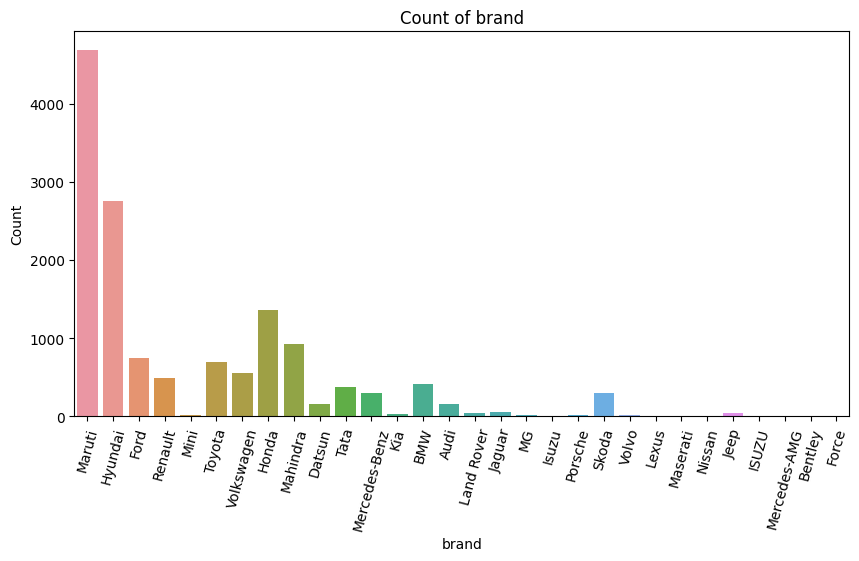

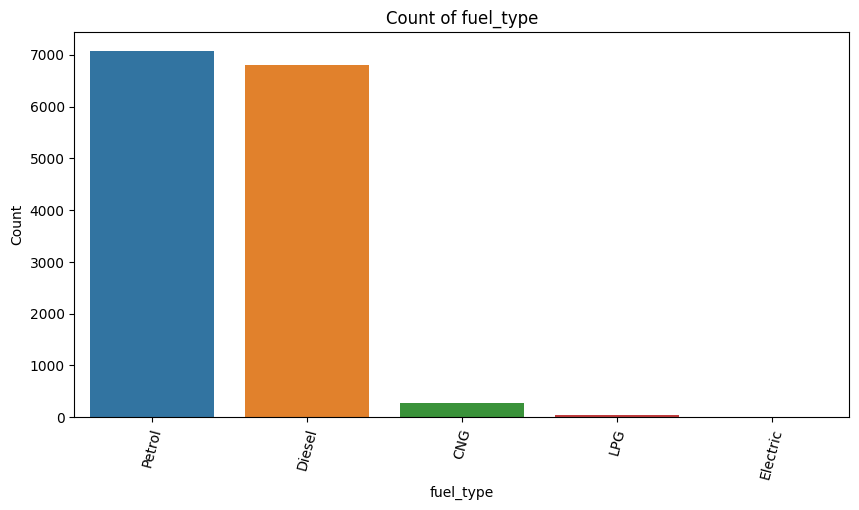

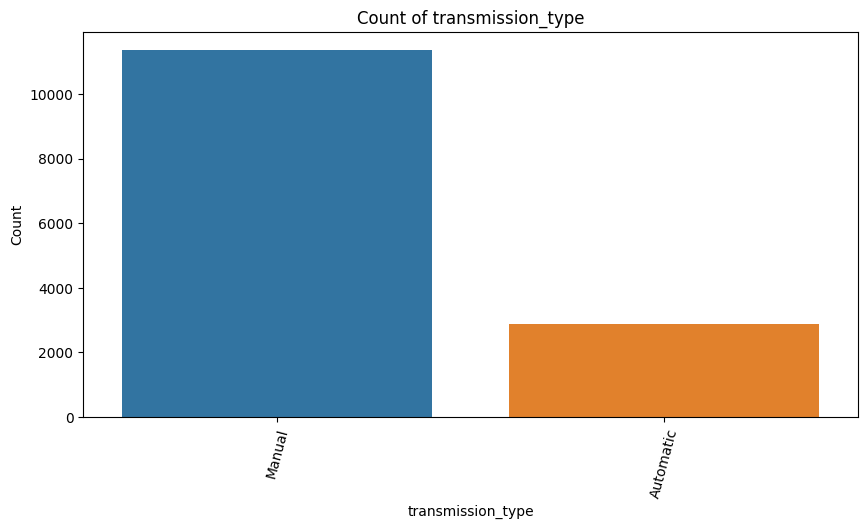

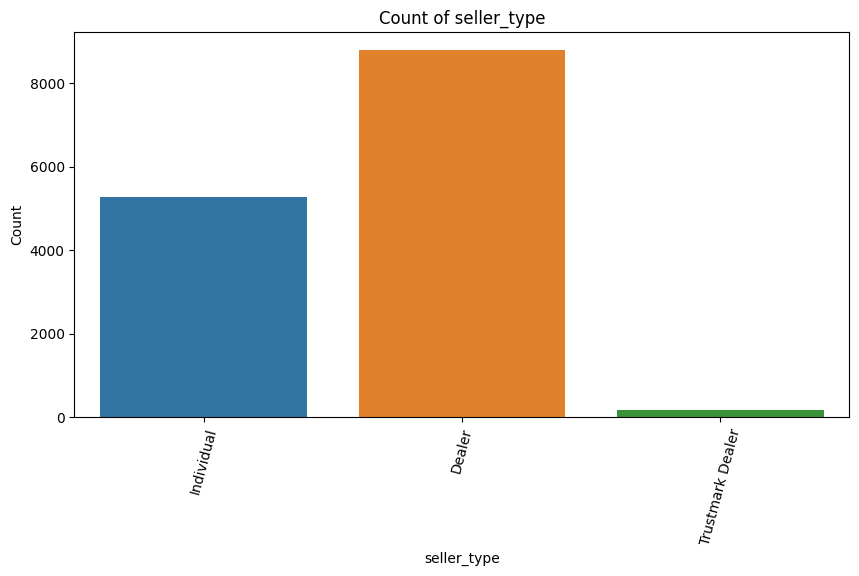

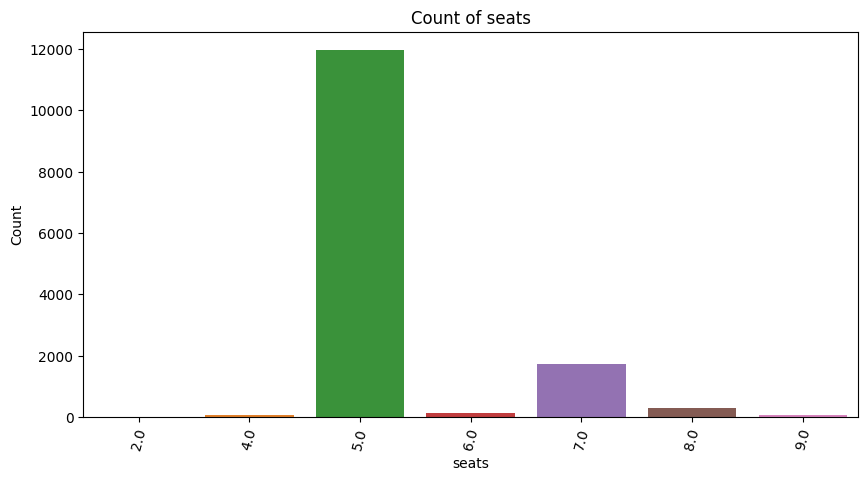

In [49]:
for feature in categorical_df.columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=feature, data=categorical_df)
    plt.title(f'Count of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=75)
    plt.show()

Observations:

Hyundai and Maruti are by far the most commonly driven brands.

The fuel types are dominated by either diesal or petrol with other variants very sparsely represented, these could potentially be grouped into a combined category of "other" given their sparsity - all are also consider alternative fuels to traditional ICE vehicles. 

There appear to be far more sales from dealers than from individuals - the third class in this feature is also very sparsely represented and could potentially be included within the dealer category.

Most cars are manual transmission types, with automatic cars less represented, this could be due to more newer models starting to incorporate automatic transmissions and potentially due to the higher cost of automatic vehicles.


The vast majority of cards are 5 seaters, with very sparse values outside of this range, more than 90% of cars in this sample are 5 seaters, there may be value in converting this to a binary variable which would also help reduce dimensionality.

#### 4.5 Encode categorical features

In [50]:
# encode transmission_type as 1 for 'Automatic' and 0 for 'Manual'
categorical_df['transmission_type'] = categorical_df['transmission_type'].map({'Automatic': 1, 'Manual': 0})

categorical_df

brand fuel_type  transmission_type seller_type  seats
0       Maruti    Petrol                  0  Individual    5.0
1      Hyundai    Petrol                  0  Individual    5.0
2      Hyundai    Petrol                  0  Individual    5.0
3       Maruti    Petrol                  0  Individual    5.0
4         Ford    Diesel                  0      Dealer    5.0
...        ...       ...                ...         ...    ...
14216  Hyundai    Petrol                  0      Dealer    5.0
14217  Hyundai    Petrol                  0      Dealer    5.0
14218   Maruti    Petrol                  0      Dealer    7.0
14219    Skoda    Diesel                  0      Dealer    5.0
14220    Honda    Petrol                  1      Dealer    5.0

[14221 rows x 5 columns]

There are a lot of dimensions within the brand feature. I wanted to find a way to condense this value down, one potential way was to separate brands into ones that are luxury vs non-luxury. 

This could be done via a mapping dictionary or from stakeholder input, however in this instance I could not rely on this and did not want to use a subjective interpretation so instead identified all brands with an average sale price of less than 1 standard deviation from the mean of all brands as an affordable brand.

In [51]:
outliers_removed_combined['selling_price'].quantile(0.75)

800000.0

In [52]:
# Calculate average selling price per brand 
avg_selling_price_per_brand = outliers_removed_combined.groupby('brand')['selling_price'].mean()

# Calculate mean and std of selling price across brands
mean_selling_price = avg_selling_price_per_brand.mean()
std_selling_price = avg_selling_price_per_brand.std()

# Create an indicator column for affordable brands (brands with average selling price <= 1 std from mean)
affordable_brands = avg_selling_price_per_brand[avg_selling_price_per_brand < outliers_removed_combined['selling_price'].quantile(0.75)].index.tolist()
categorical_df['affordable_brand'] = categorical_df['brand'].isin(affordable_brands).astype(int)
categorical_df


brand fuel_type  transmission_type seller_type  seats   
0       Maruti    Petrol                  0  Individual    5.0  \
1      Hyundai    Petrol                  0  Individual    5.0   
2      Hyundai    Petrol                  0  Individual    5.0   
3       Maruti    Petrol                  0  Individual    5.0   
4         Ford    Diesel                  0      Dealer    5.0   
...        ...       ...                ...         ...    ...   
14216  Hyundai    Petrol                  0      Dealer    5.0   
14217  Hyundai    Petrol                  0      Dealer    5.0   
14218   Maruti    Petrol                  0      Dealer    7.0   
14219    Skoda    Diesel                  0      Dealer    5.0   
14220    Honda    Petrol                  1      Dealer    5.0   

       affordable_brand  
0                     1  
1                     1  
2                     1  
3                     1  
4                     1  
...                 ...  
14216                 1  
14217                 1  
14218                 1  
14219                 1  
14220                 1  

[14221 rows x 6 columns]

In [53]:
affordable_brands

['Datsun',
 'Force',
 'Ford',
 'Honda',
 'Hyundai',
 'Mahindra',
 'Maruti',
 'Renault',
 'Skoda',
 'Tata',
 'Volkswagen']

In [54]:
# if fuel type is not in 'Petrol' or 'Diesel' label as 'Alternative'
categorical_df['fuel_type'] = categorical_df['fuel_type'].apply(lambda x: 'Alternative' if x not in ['Petrol', 'Diesel'] else x)

# include 'Trustmark Dealer' as a 'Dealer'
categorical_df['seller_type'] = categorical_df['seller_type'].apply(lambda x: 'Dealer' if x == 'Trustmark Dealer' else x)

In [55]:
# create dummies for brand, fuel_type, seller_type and seats
categorical_df = pd.get_dummies(categorical_df, columns=['fuel_type', 'seller_type', 'seats'])
categorical_df.drop(columns=['brand'], inplace=True)  # drop brand as it is already encoded
# convert all values to int
categorical_df = categorical_df.astype(int)
categorical_df

transmission_type  affordable_brand  fuel_type_Alternative   
0                      0                 1                      0  \
1                      0                 1                      0   
2                      0                 1                      0   
3                      0                 1                      0   
4                      0                 1                      0   
...                  ...               ...                    ...   
14216                  0                 1                      0   
14217                  0                 1                      0   
14218                  0                 1                      0   
14219                  0                 1                      0   
14220                  1                 1                      0   

       fuel_type_Diesel  fuel_type_Petrol  seller_type_Dealer   
0                     0                 1                   0  \
1                     0                 1                   0   
2                     0                 1                   0   
3                     0                 1                   0   
4                     1                 0                   1   
...                 ...               ...                 ...   
14216                 0                 1                   1   
14217                 0                 1                   1   
14218                 0                 1                   1   
14219                 1                 0                   1   
14220                 0                 1                   1   

       seller_type_Individual  seats_2.0  seats_4.0  seats_5.0  seats_6.0   
0                           1          0          0          1          0  \
1                           1          0          0          1          0   
2                           1          0          0          1          0   
3                           1          0          0          1          0   
4                           0          0          0          1          0   
...                       ...        ...        ...        ...        ...   
14216                       0          0          0          1          0   
14217                       0          0          0          1          0   
14218                       0          0          0          0          0   
14219                       0          0          0          1          0   
14220                       0          0          0          1          0   

       seats_7.0  seats_8.0  seats_9.0  
0              0          0          0  
1              0          0          0  
2              0          0          0  
3              0          0          0  
4              0          0          0  
...          ...        ...        ...  
14216          0          0          0  
14217          0          0          0  
14218          1          0          0  
14219          0          0          0  
14220          0          0          0  

[14221 rows x 14 columns]

#### 4.6 Bivariate and Multivariate Analysis: Calculate the correlation matrix for the numerical variable. Generate heatmap for the correlation matrix, and describe the evident relationships.

In [56]:
# merge encoded categorical_df with scaled_numeric_df
combined_df = pd.concat([scaled_numeric_df, categorical_df], axis=1, sort=False) 
combined_df['selling_price'] = outliers_removed_combined['selling_price']

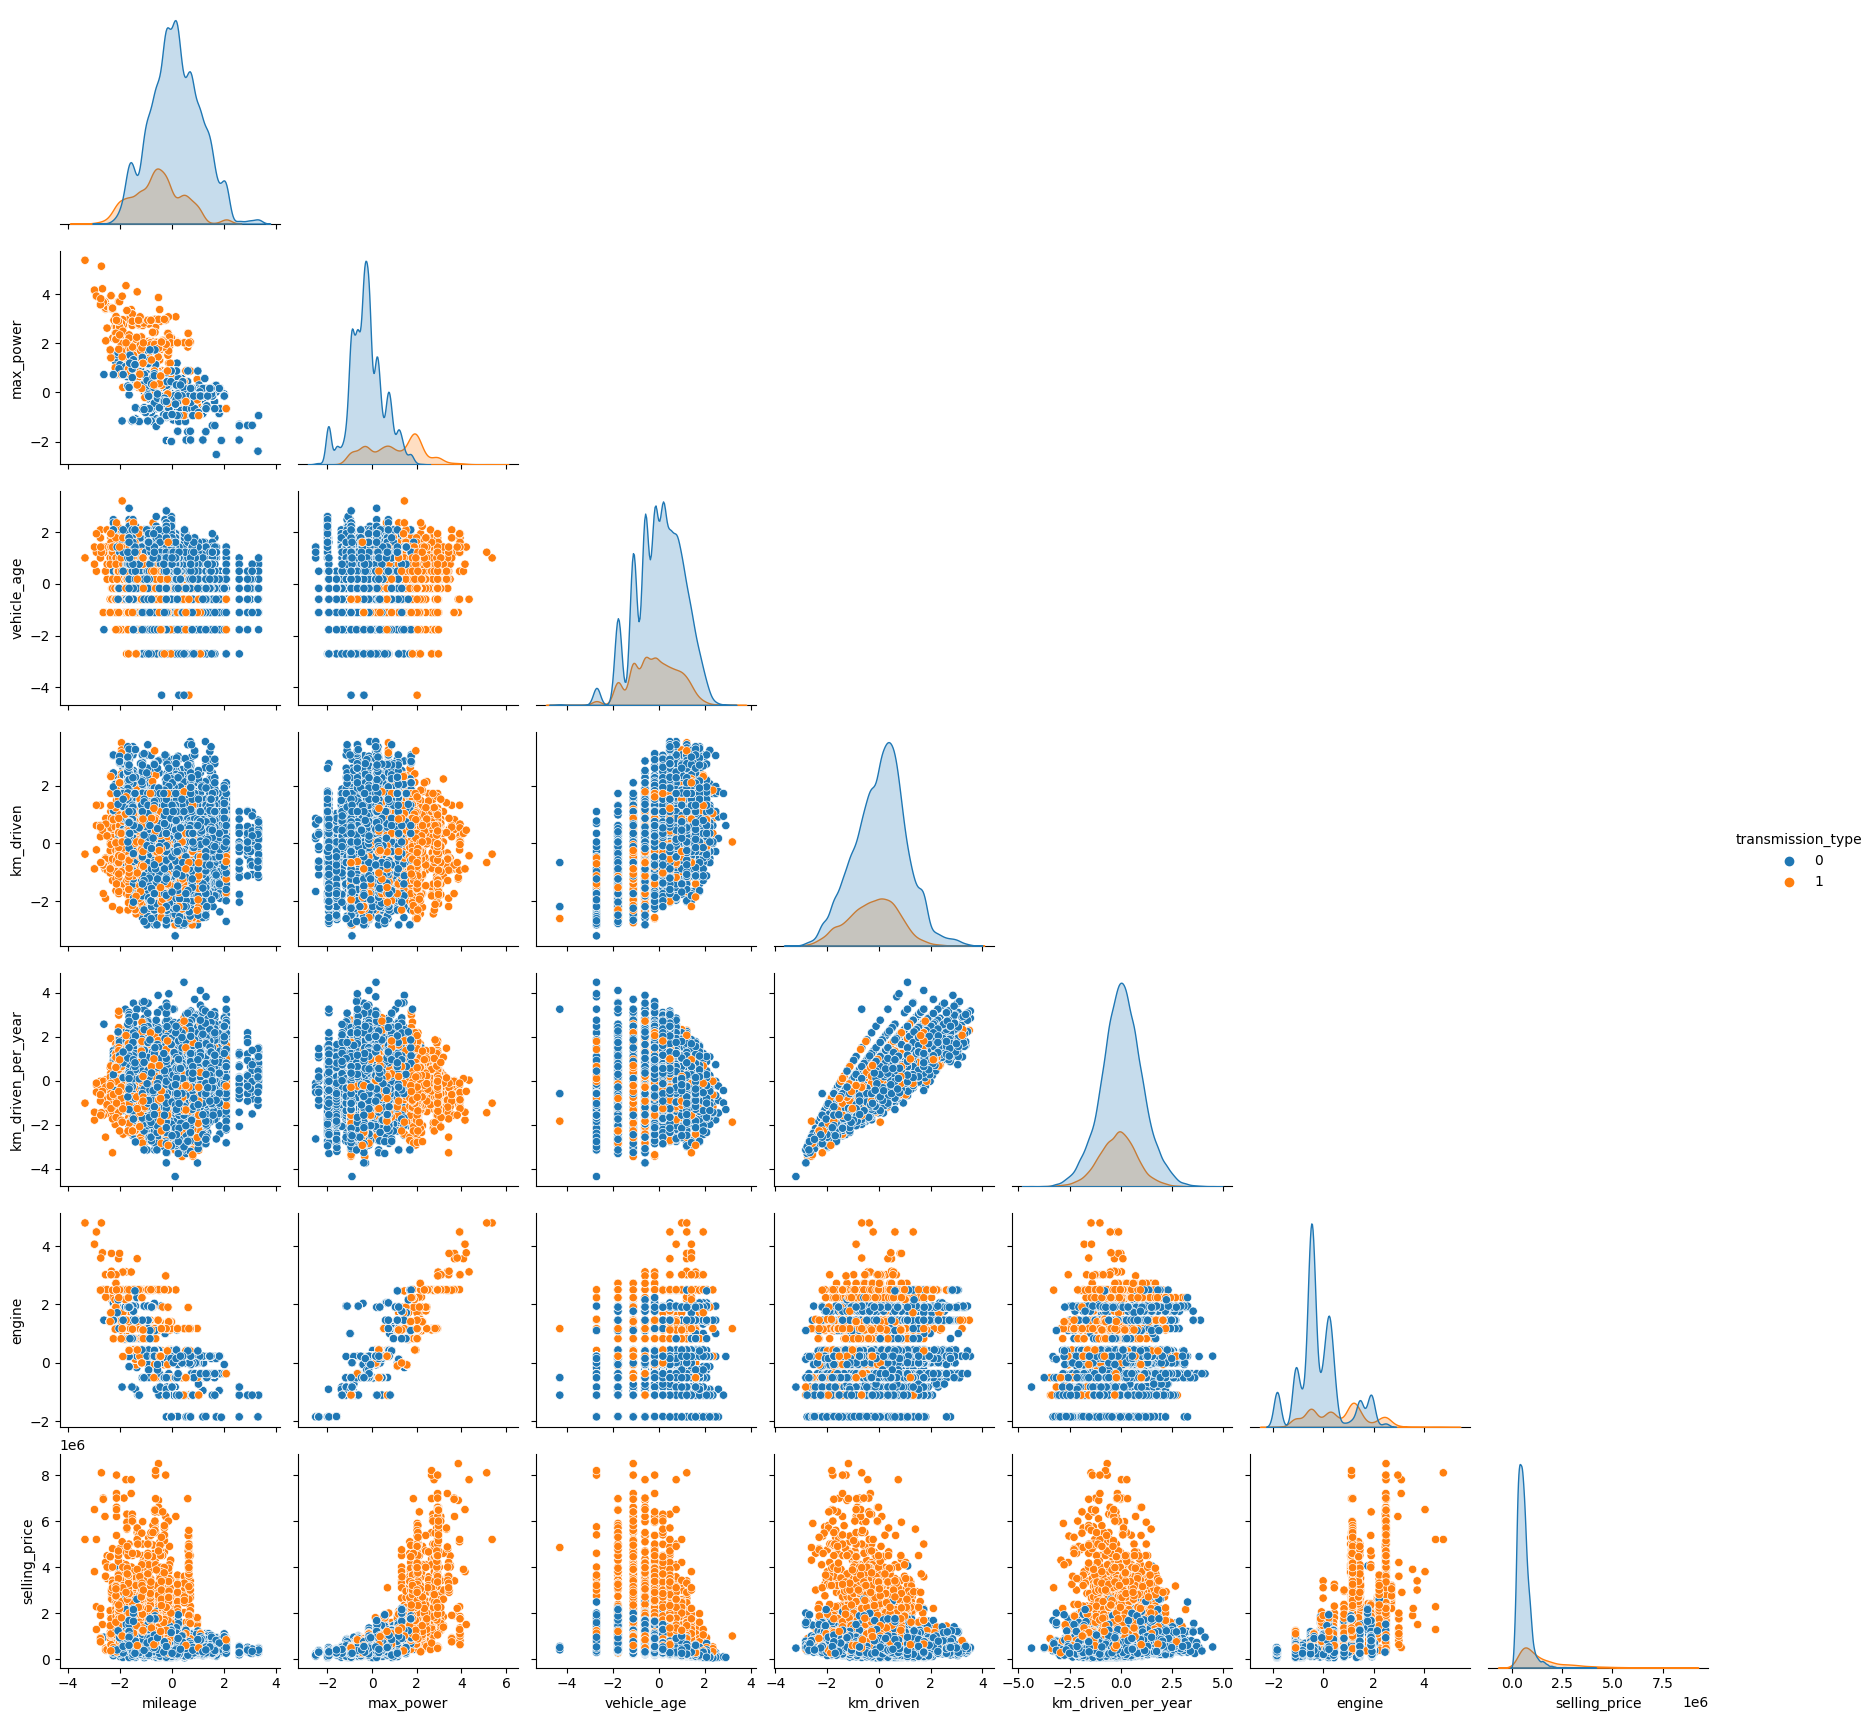

In [57]:
# use seaborn to create a pairplot for the combined features - this will help us visualize bivariate relationships
sns.pairplot(combined_df[['transmission_type', 'mileage', 'max_power', 'vehicle_age', 
                         'km_driven', 'km_driven_per_year', 'engine', 'selling_price']], corner=True, hue='transmission_type')

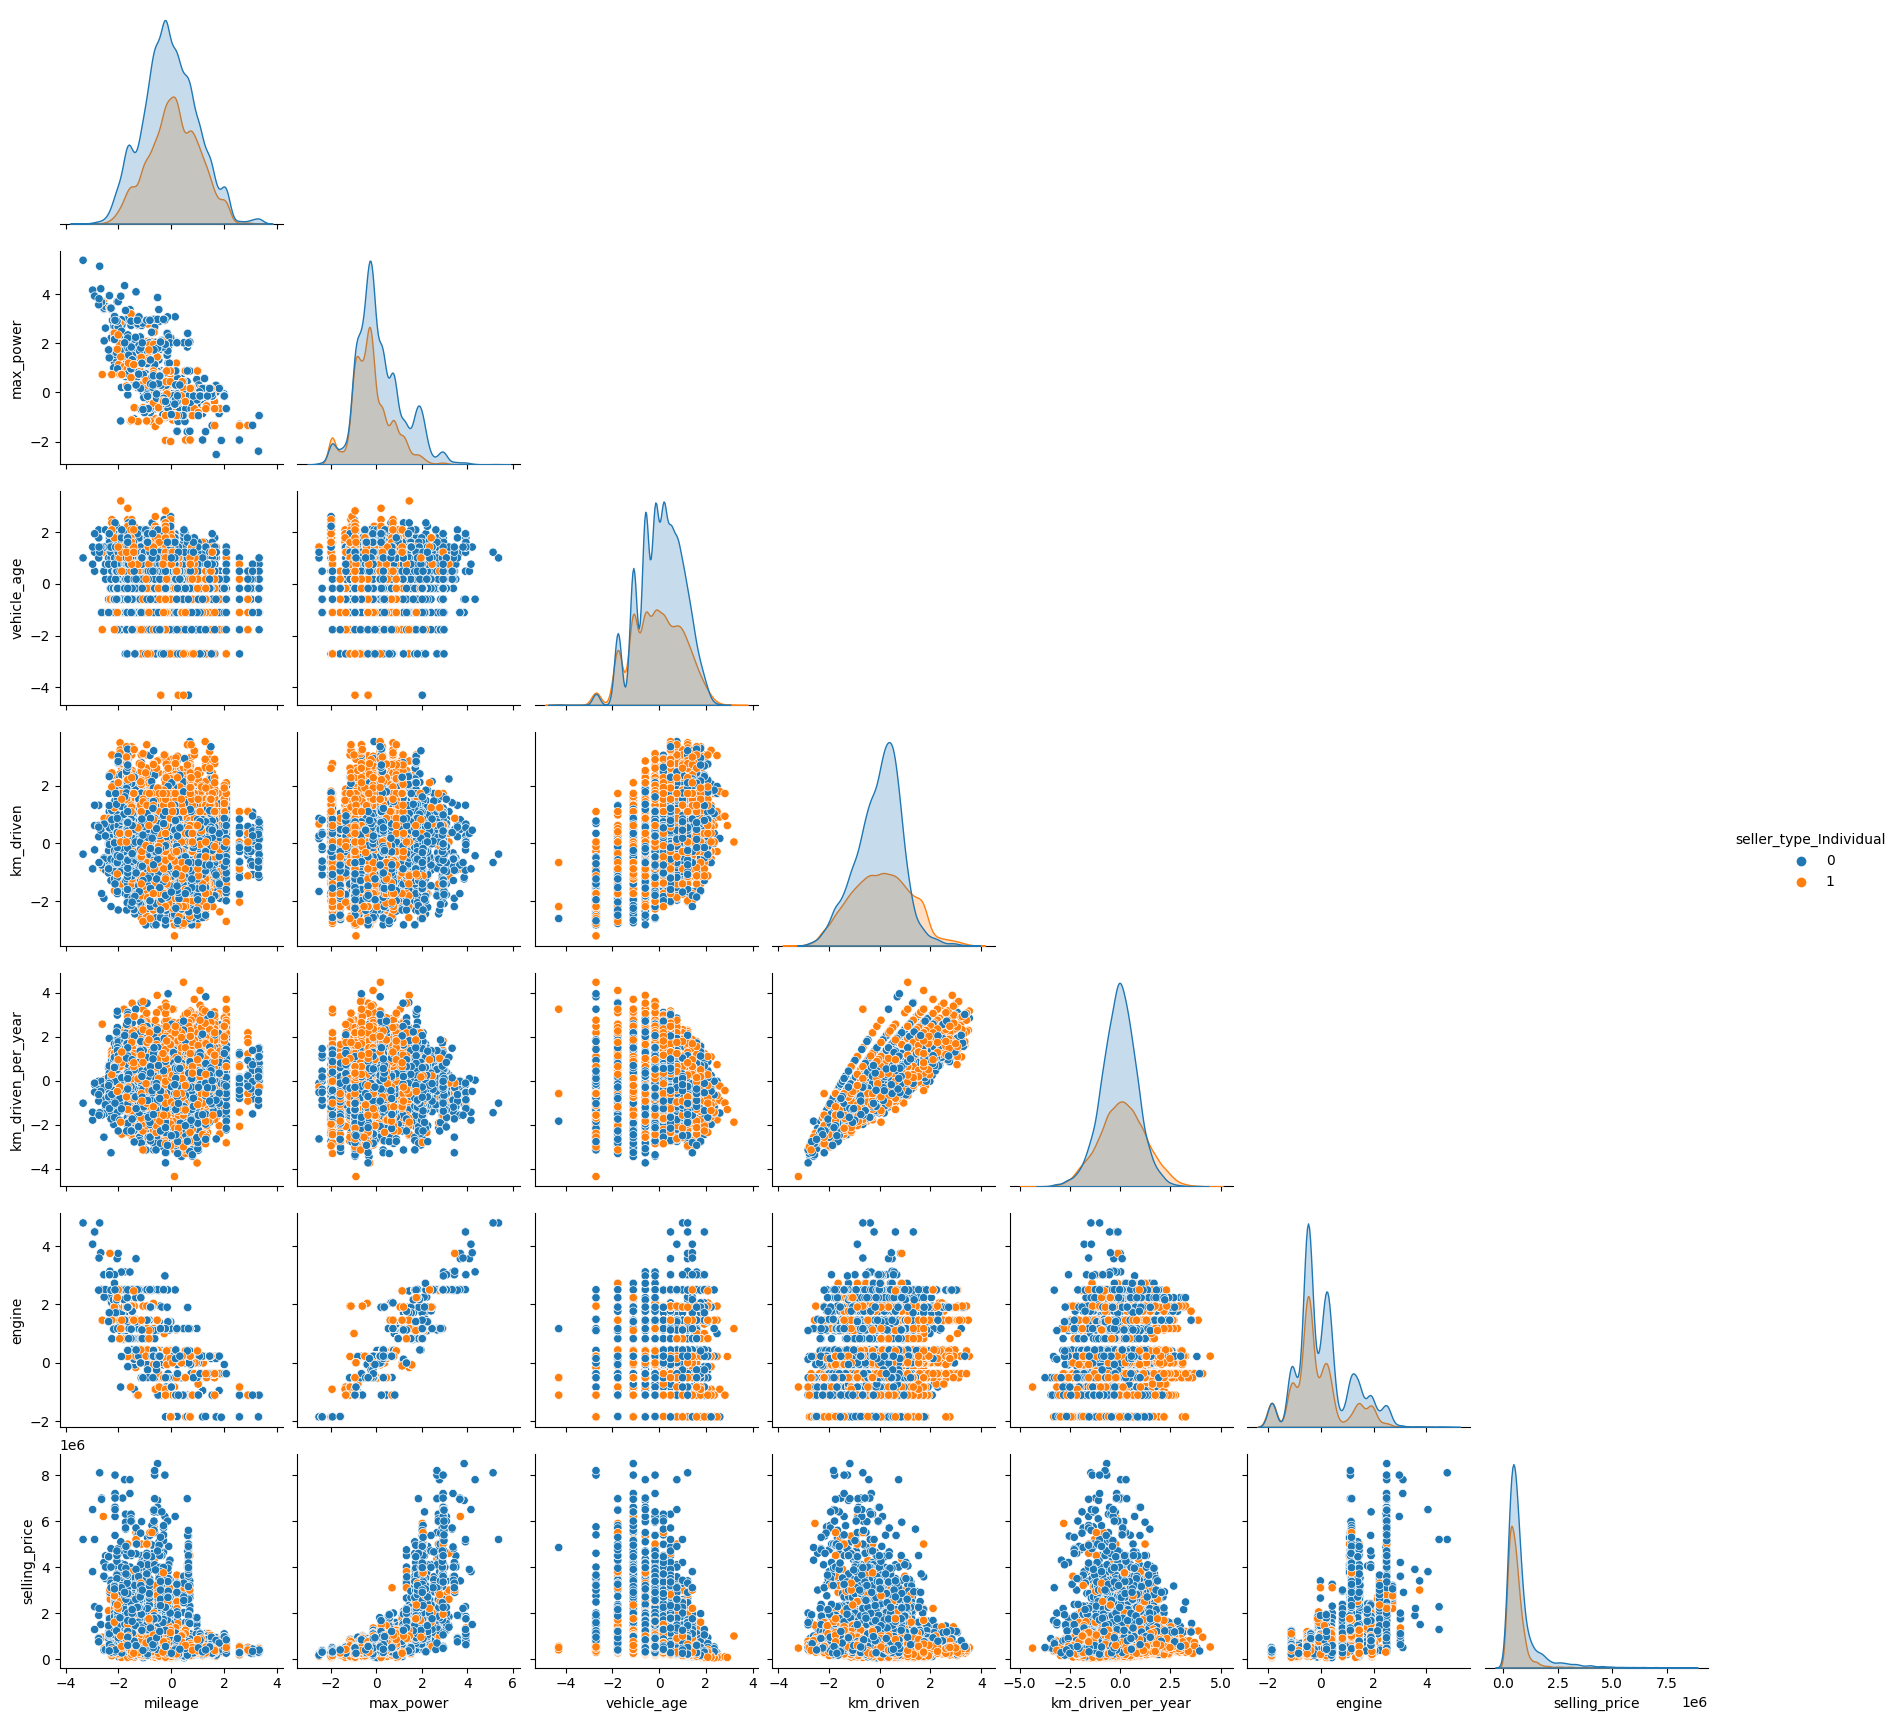

In [58]:
# use seaborn to create a pairplot for the combined features - this will help us visualize bivariate relationships
sns.pairplot(combined_df[['seller_type_Individual', 'mileage', 'max_power', 'vehicle_age', 
                         'km_driven', 'km_driven_per_year', 'engine', 'selling_price']], corner=True, hue='seller_type_Individual')

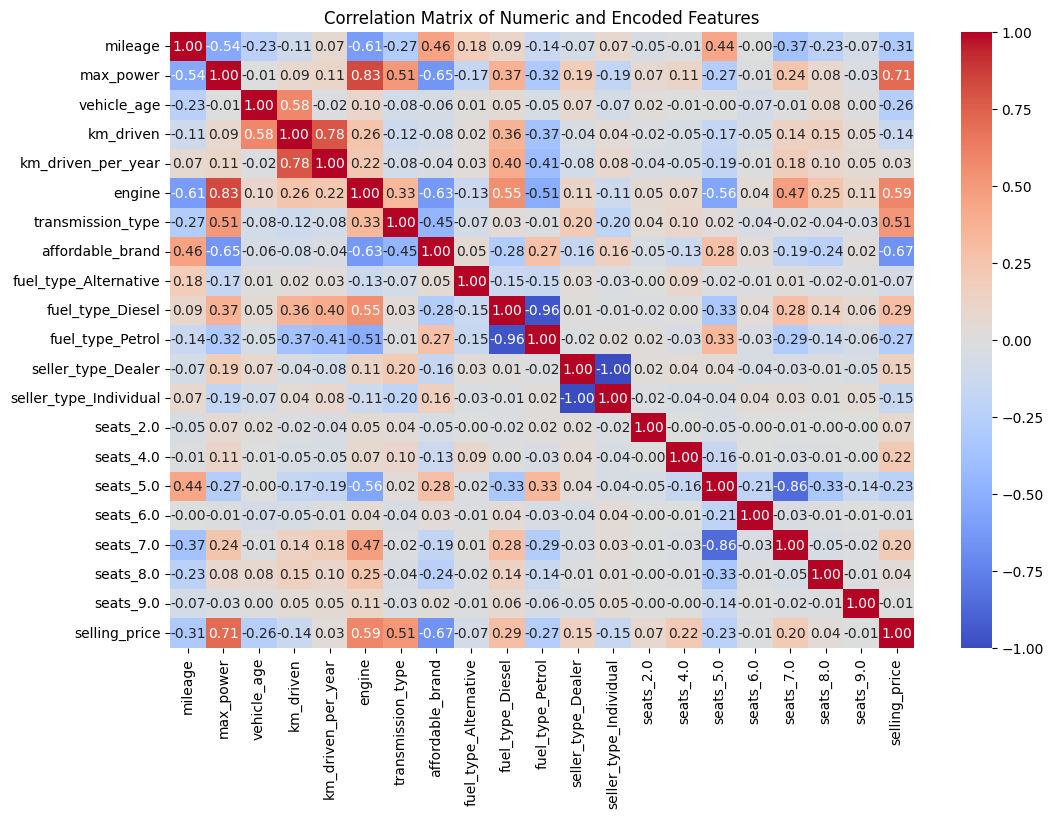

In [59]:
feature_correlation_matrix = combined_df.corr() 
plt.figure(figsize=(12, 8))
sns.heatmap(feature_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numeric and Encoded Features')
plt.show()

<Axes: title={'center': 'Average Selling Price per Seats'}, xlabel='seats'>

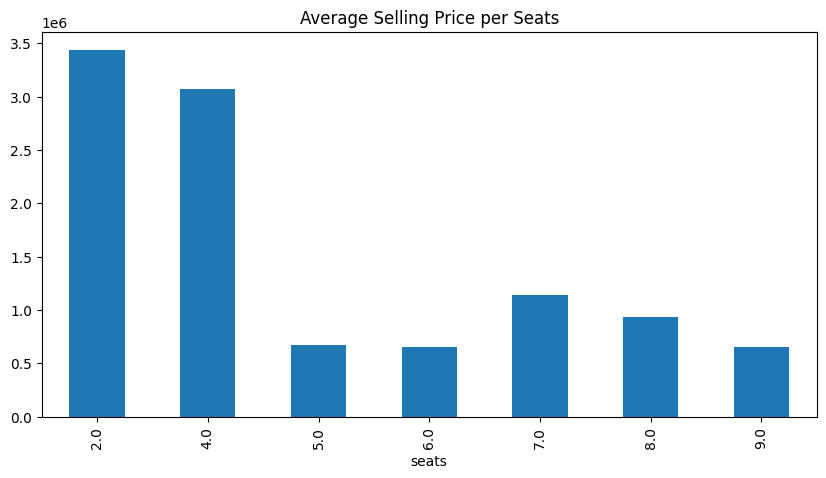

In [60]:
# non - linear relationship between seats and selling price
avg_selling_price_per_seats = outliers_removed_combined.groupby('seats')['selling_price'].mean().sort_index()
avg_selling_price_per_seats.plot.bar(figsize=(10, 5), title='Average Selling Price per Seats')

<Axes: title={'center': 'Feature Correlation to Selling Price'}>

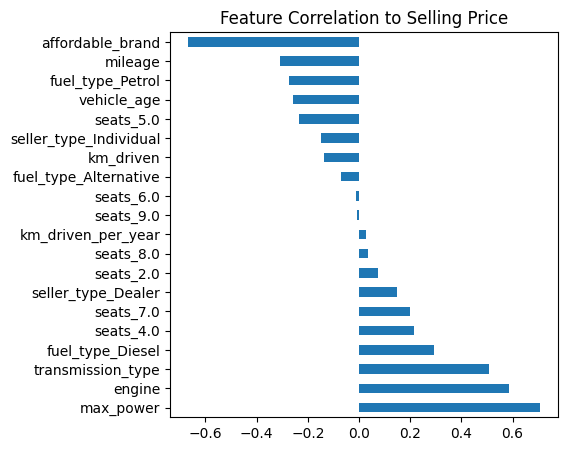

In [61]:
feature_correlation = feature_correlation_matrix['selling_price'].drop('selling_price').sort_values(ascending=False)
feature_correlation.plot.barh(figsize=(5, 5), title='Feature Correlation to Selling Price')

#### 4.7 Provide detailed observations and conclusions.

Vehicle age, Km driven and mileage are all negatively correlated to selling price. This makes sense as this is what we would traditionally expect. 

Engine size and max power are strongly positively correlated, this also makes sense as vehicles with larger engines and greater power tend to be more expensive, such as muscle cars and sports cars etc. It is a concern for potential multi-colinearity.

Km driven and vehicle age are strongly positively correlated, this is understandable as the older a vehicle is the more it is likely to have been driven further over time. 

It is also interesting to note that engine size and max power are negatively correlated, this may potentially be due to fuel consumption of these vehicles, deterring owners from driving them often. They may also hint toward more luxury cars which could be more of a center piece of a collection or only driven on more special occasions than day to day driving.

Complex non-linear relationship seen with number of seats and car price - fewer seats showing a strong positive relationship, then 5 seaters being the most ordinary configuration showing a negative correlation to price. Sports cars and coupes are more likely to have fewer seats and larger expensive SUVs could have configurations of 7 seaters.

### Section 5: Feature Selection 

#### 5.1 Use correlation result for feature selection.

In [62]:
# Select top 10 features most correlated with selling_price (excluding itself)
correlations = feature_correlation_matrix['selling_price'].drop('selling_price').abs()
top_10_features = correlations.sort_values(ascending=False).head(10).index.tolist()
print(f"Top 10 features most correlated with selling_price: {top_10_features}")

Top 10 features most correlated with selling_price: ['max_power', 'affordable_brand', 'engine', 'transmission_type', 'mileage', 'fuel_type_Diesel', 'fuel_type_Petrol', 'vehicle_age', 'seats_5.0', 'seats_4.0']


#### 5.2 Select the features according to the K highest score. 

In [63]:
k = 10  # number of features to select
X = combined_df.drop(columns=['selling_price'])
y = combined_df['selling_price']

# use SelectKBest to select top k features
selector = SelectKBest(score_func=f_regression, k=k)

selector.fit(X, y)

# get the selected feature indices
selected_indices = selector.get_support(indices=True)

kbest_features = X.columns[selected_indices].tolist()
print(f"Top 10 features using SelectKBest: {kbest_features}")

Top 10 features using SelectKBest: ['mileage', 'max_power', 'vehicle_age', 'engine', 'transmission_type', 'affordable_brand', 'fuel_type_Diesel', 'fuel_type_Petrol', 'seats_4.0', 'seats_5.0']


In [64]:
# differences
[x for x in top_10_features if x not in kbest_features], [x for x in kbest_features if x not in top_10_features]

([], [])

#### 5.3 Provide detailed insights about the selected features.

It is very interesting that the exact same features have been identified by the correlation analysis as well as the select k - best feature selection. 

This either highlights that a very robust feature preparation, transformation, scaling and encoding approach has been followed or potentially that some nuance or complexity has been reduced in the interaction of features that have resulted in a more straightforward assessment of feature importance. 

However, having said this, the order of the feature importance is not identical and the different approaches have found certain features more important than others within the list. 

If a shorter subset of features had been selected, differences in the features chosen would arise, for example the top 5, while have significant overlap, differ by 1 feature. 

It is very interesting to note that in the top 5 of both methods, they were dominated by specifications that were internal to the vehicle, such as mileage efficiency, power and engine capacity. 

Brand interaction also represents an intersting dimension and appeared near the middle of both lists, there may be further value that could be extracted from this feature with additional feature engineering.

The performance of the chosen features can be assessed by seeing how they perform within a regression model.

### Section 6: Model Selection and Training:

#### 6.1 Choose at least three different machine learning algorithms to train on the dataset.

The models chosen for evaluation are:
- Linear Regression
- Support Vector Regression
- Random Forest Regression

#### Assessing Model Performance in Regression Tasks

To evaluate the performance of regression models, several metrics are commonly used:

- **Mean Squared Error (MSE):** Measures the average squared difference between actual and predicted values. Lower MSE indicates better model accuracy and fewer large errors.
- **R² Score (Coefficient of Determination):** Indicates how well the model explains the variance in the target variable. Values closer to 1 suggest a better fit and stronger predictive power.
- **Mean Absolute Error (MAE):** Represents the average absolute difference between actual and predicted values. It is less sensitive to outliers than MSE and provides a straightforward measure of prediction accuracy.

Together, these metrics provide a comprehensive view of model performance, helping to identify both the accuracy and reliability of predictions in regression tasks.

In [65]:
# log transformation of selling_price
y = np.log1p(y)

X_train, X_test, y_train, y_test = train_test_split(X.loc[:,top_10_features], y, test_size=0.2, random_state=42)

In [62]:
evaluation_results = {
    "Model": [],
    "MSE_Train": [],
    "MSE_Test": [],
    "MAE_Train": [],
    "MAE_Test": [],
    "r2_score_Train": [],
    "r2_score_Test": []
}


#### Train linear regression model

In [63]:
model = LinearRegression()
model.fit(X_train, y_train)

# evaluate the model

# evaluate on train set
y_train_pred = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
mae_train = np.mean(np.abs(y_train - y_train_pred))

# evaluate on test set
y_test_pred = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
mae_test = np.mean(np.abs(y_test - y_test_pred))

# append results to evaluation_results
evaluation_results["Model"].append("Linear Regression")
evaluation_results["MSE_Train"].append(mse_train)
evaluation_results["MSE_Test"].append(mse_test)
evaluation_results["MAE_Train"].append(mae_train)
evaluation_results["MAE_Test"].append(mae_test)
evaluation_results["r2_score_Train"].append(r2_train)
evaluation_results["r2_score_Test"].append(r2_test)

print(f"Train Mean Squared Error: {mse_train:.4f}")
print(f"Train Mean Absolute Error: {mae_train:.4f}")
print(f"Train R^2 Score: {r2_train:.4f}\n")

print(f"Test Mean Squared Error: {mse_test:.4f}")
print(f"Test Mean Absolute Error: {mae_test:.4f}")
print(f"Test R^2 Score: {r2_test:.4f}\n")
# use the model to evaluate the coefficients of the selected features
coefficients = pd.DataFrame(model.coef_, index=top_10_features, columns=['Coefficient'])
print(coefficients)

Train Mean Squared Error: 0.0638
Train Mean Absolute Error: 0.1957
Train R^2 Score: 0.8585

Test Mean Squared Error: 0.0635
Test Mean Absolute Error: 0.1974
Test R^2 Score: 0.8595

                   Coefficient
max_power             0.320162
affordable_brand     -0.411160
engine                0.070139
transmission_type     0.174155
mileage               0.034263
fuel_type_Diesel      0.103763
fuel_type_Petrol     -0.061922
vehicle_age          -0.303860
seats_5.0            -0.047368
seats_4.0             0.114441


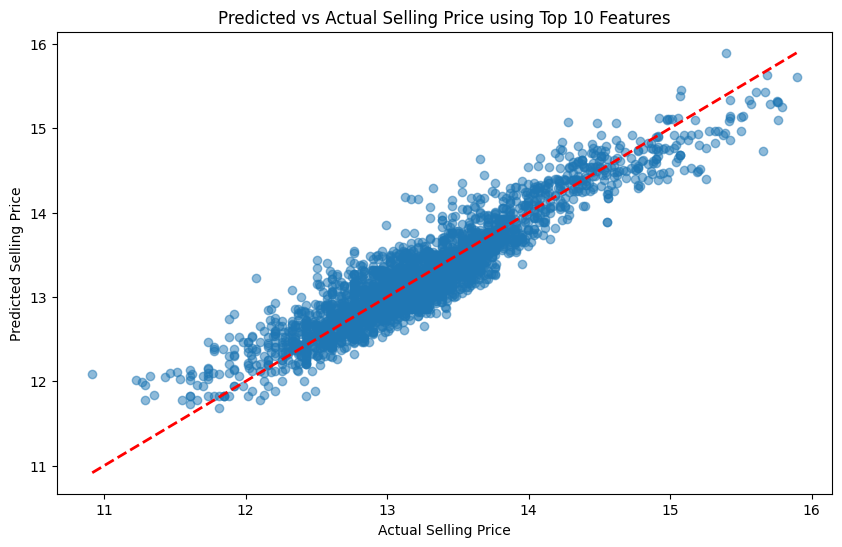

In [64]:
# visualize predicted vs actual selling price
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Predicted vs Actual Selling Price using Top 10 Features')
plt.show()

In [65]:
# serialize model
import pickle
with open('linear_regression_model.pkl', 'wb') as f:
    pickle.dump(model, f)

#### SVR

In [66]:
# hyperparameter tuning for SVR using GridSearchCV
svr = SVR()
param_grid = {
    'C': [0.1, 0.5, 1, 5, 10],
    'gamma': ['scale', 'auto', 0.1, 0.01, 0.001],
    'epsilon': [0.01, 0.05, 0.1, 0.2, 0.5],
    'kernel': ['rbf', 'linear', 'poly']
}

grid = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=6, verbose=1)
grid.fit(X_train[top_10_features], y_train)

print("Best params:", grid.best_params_)
print("Best CV MSE:", -grid.best_score_)

# set the best estimator as svr_model for evaluation below
svr_model = grid.best_estimator_

Fitting 5 folds for each of 375 candidates, totalling 1875 fits
Best params: {'C': 10, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
Best CV MSE: 0.036126735042431406


In [67]:
# serialize svr_model using pickle
import pickle
with open('svr_model.pkl', 'wb') as f:
    pickle.dump(svr_model, f)

In [79]:
# evaluate the model
# evaluate on train set
y_pred_train = svr_model.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
mae_train = np.mean(np.abs(y_train - y_pred_train))

# evaluate on test set
y_pred_test = svr_model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
mae_test = np.mean(np.abs(y_test - y_pred_test))

# append results to evaluation_results
evaluation_results["Model"].append("SVR")
evaluation_results["MSE_Train"].append(mse_train)
evaluation_results["MSE_Test"].append(mse_test)
evaluation_results["MAE_Train"].append(mae_train)
evaluation_results["MAE_Test"].append(mae_test)
evaluation_results["r2_score_Train"].append(r2_train)
evaluation_results["r2_score_Test"].append(r2_test)

print(f"SVR Train MSE: {mse_train:.6f}")
print(f"SVR Train R^2: {r2_train:.4f}")
print(f"SVR Train MAE: {mae_train:.6f}\n")
print(f"SVR Test MSE:  {mse_test:.6f}")
print(f"SVR Test R^2:  {r2_test:.4f}")
print(f"SVR Test MAE:  {mae_test:.6f}\n")

SVR Train MSE: 0.032089
SVR Train R^2: 0.9289
SVR Train MAE: 0.135786

SVR Test MSE:  0.036633
SVR Test R^2:  0.9189
SVR Test MAE:  0.144660



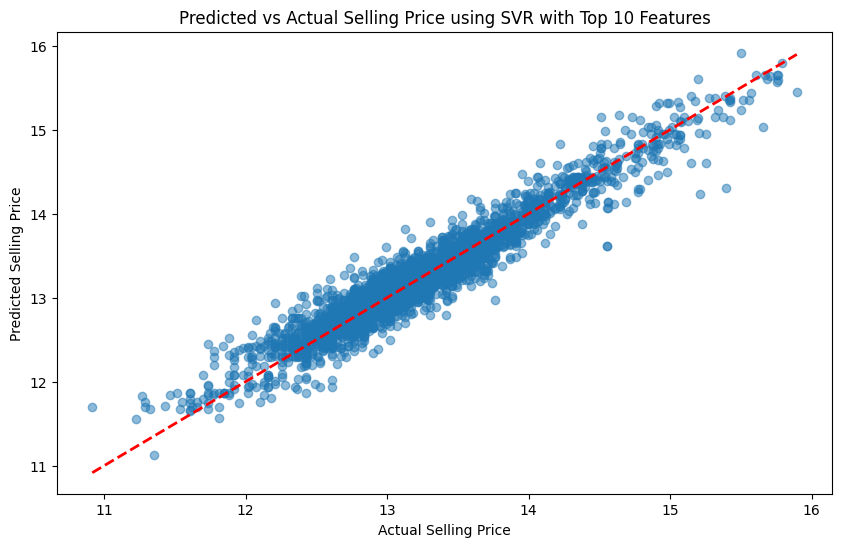

In [69]:
# visualize predicted vs actual selling price for svr
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Predicted vs Actual Selling Price using SVR with Top 10 Features')
plt.show()

#### Random Forest

In [70]:
# grid search cv for random forest regressor
rf = RandomForestRegressor(random_state=42)

param_grid_rf = {
    'n_estimators': [100, 150, 200],
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'criterion': ['squared_error', 'absolute_error'],
    'max_features': ['sqrt', 'log2']
}

grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='neg_mean_squared_error', n_jobs=6, verbose=1)
grid_rf.fit(X_train[top_10_features], y_train)

print("Best params for RF:", grid_rf.best_params_)
print("Best CV MSE for RF:", -grid_rf.best_score_)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best params for RF: {'criterion': 'squared_error', 'max_depth': 9, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 150}
Best CV MSE for RF: 0.03571219718721651


In [71]:
# set the best estimator as rf_model for evaluation below
rf_model = grid_rf.best_estimator_
# evaluate the model
# evaluate on train set
y_pred_train_rf = rf_model.predict(X_train[top_10_features])
mse_rf_train = mean_squared_error(y_train, y_pred_train_rf)
r2_rf_train = r2_score(y_train, y_pred_train_rf)
mae_rf_train = np.mean(np.abs(y_train - y_pred_train_rf))

# evaluate on test set
y_pred_rf = rf_model.predict(X_test[top_10_features])
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = np.mean(np.abs(y_test - y_pred_rf))

# append results to evaluation_results
evaluation_results["Model"].append("Random Forest")
evaluation_results["MSE_Train"].append(mse_rf_train)
evaluation_results["MSE_Test"].append(mse_rf)
evaluation_results["MAE_Train"].append(mae_rf_train)
evaluation_results["MAE_Test"].append(mae_rf)
evaluation_results["r2_score_Train"].append(r2_rf_train)
evaluation_results["r2_score_Test"].append(r2_rf)

print(f"Random Forest Train MSE: {mse_rf_train}")
print(f"Random Forest Train R^2: {r2_rf_train}")
print(f"Random Forest Train MAE: {mae_rf_train}\n")

print(f"Random Forest Test MSE: {mse_rf}")
print(f"Random Forest Test R^2 Score: {r2_rf}")
print(f"Random Forest Test MAE: {mae_rf}\n")

Random Forest Train MSE: 0.030175385419987922
Random Forest Train R^2: 0.9330972016990174
Random Forest Train MAE: 0.13358909429296162

Random Forest Test MSE: 0.03425657393631772
Random Forest Test R^2 Score: 0.9241738990716977
Random Forest Test MAE: 0.14240081016332304



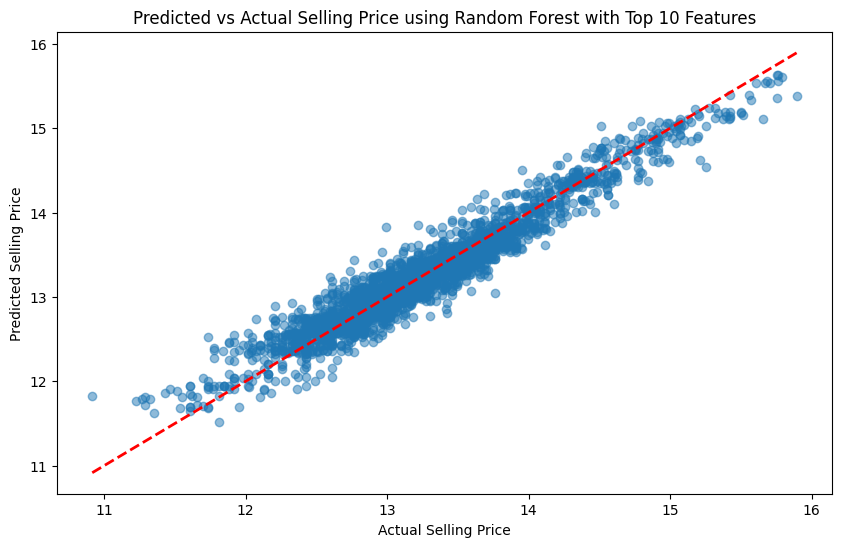

In [72]:
# visualize predicted vs actual selling price for random forest
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Predicted vs Actual Selling Price using Random Forest with Top 10 Features')
plt.show()

In [73]:
df_eval_results = pd.DataFrame(evaluation_results)

df_eval_results

Model  MSE_Train  MSE_Test  MAE_Train  MAE_Test   
0  Linear Regression   0.063828  0.063454   0.195741  0.197386  \
1                SVR   0.032089  0.036633   0.135786  0.144660   
2      Random Forest   0.030175  0.034257   0.133589  0.142401   

   r2_score_Train  r2_score_Test  
0        0.858485       0.859545  
1        0.928855       0.918913  
2        0.933097       0.924174

In [74]:
# choose best model based on test r2_score however cater for overfitting by comparing train and test r2_score
best_model_name = None
best_r2_score = -np.inf

for i in range(len(df_eval_results)):
    model_name = df_eval_results.loc[i, "Model"]
    r2_train = df_eval_results.loc[i, "r2_score_Train"]
    r2_test = df_eval_results.loc[i, "r2_score_Test"]
    
    # check for overfitting by ensuring the difference between train and test r2_score is within 0.1
    if abs(r2_train - r2_test) <= 0.1:
        if r2_test > best_r2_score:
            best_r2_score = r2_test
            best_model_name = model_name

print(f"Best model is {best_model_name} with Test R^2 Score: {best_r2_score:.4f}")

Best model is Random Forest with Test R^2 Score: 0.9242


In [80]:
# serialize rf model
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

# Model Selection Discussion

To identify the best model for car price prediction, we compared the performance of Linear Regression, Support Vector Regression (SVR), and Random Forest using several evaluation metrics, with a particular focus on the R² score for both training and test sets.

While the Random Forest model achieved the highest R² score on the test, it is important to ensure that the model is not overfitting. Overfitting occurs when a model performs significantly better on the training data than on unseen test data, which can be detected by a large difference between train and test R² scores.

To address this, we selected the best model based on the highest test R² score, but only if the difference between train and test R² scores was within 0.1. This approach ensures that the model generalizes well and is not simply memorizing the training data.

The selection logic is as follows:
- For each model, compare the train and test R² scores.
- If the absolute difference is less than or equal to 0.1, consider the model for selection.
- Choose the model with the highest test R² score among those that meet the above criterion.

Based on this process, the Random Forest model was selected as the best model, with a test R² score of 0.9242 and a train-test R² difference well within the acceptable range. This indicates strong predictive performance and good generalization to new data.

**Best Model:** Random Forest

**Test R² Score:** 0.9242

Creating reference for scalar

Input values to be scaled in the same manner as in training

In [66]:
scalar_dict = {}
for i, feature in enumerate(scaler.feature_names_in_):
    scalar_dict[feature] = {
        'mean': scaler.mean_[i],
        'scale': scaler.scale_[i]
    }

In [67]:
scalar_dict

{'mileage': {'mean': 19.78092609521131, 'scale': 4.1246159779166796},
 'max_power': {'mean': 4.544331741315781, 'scale': 0.3452326733560519},
 'vehicle_age': {'mean': 1.867031195033685, 'scale': 0.4341900646206074},
 'km_driven': {'mean': 6.795148868811872e-17, 'scale': 1.0},
 'km_driven_per_year': {'mean': -1.1991439180256244e-17, 'scale': 1.0},
 'engine': {'mean': 7.245724006330207, 'scale': 0.3036524847678331}}

# Conclusion

This project successfully developed a machine learning model to predict the selling price of used cars based on key vehicle attributes and market data. By leveraging data preprocessing, feature engineering, and regression techniques, the model provides reliable price estimates that can assist both buyers and sellers in making informed decisions.

The Streamlit web application offers an intuitive interface for users to input car details and receive instant price predictions. This demonstrates the practical application of data science and machine learning in real-world scenarios.

The web app is accessible here: https://carpriceprediction-8oetzq5g9abg3wwg65ijsg.streamlit.app/ 

## Future Work
- Integrate additional features such as car condition, location, and ownership history to improve prediction accuracy.
- Explore advanced models and ensemble techniques for further performance gains.
- Gather user feedback to refine the system.

Overall, this project highlights the value of data-driven approaches in the automotive market and sets the foundation for more comprehensive pricing tools.